In [1074]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1075]:
nids_original_dataframe = pd.read_csv('data/nids_data.csv')

#### **Data EDA**

In [1076]:
print(nids_original_dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [1077]:
nids_original_dataframe.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1078]:
nids_original_dataframe.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [1079]:
print(nids_original_dataframe.isna().sum())

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [1080]:
print(nids_original_dataframe['class'].unique())

['normal' 'anomaly']


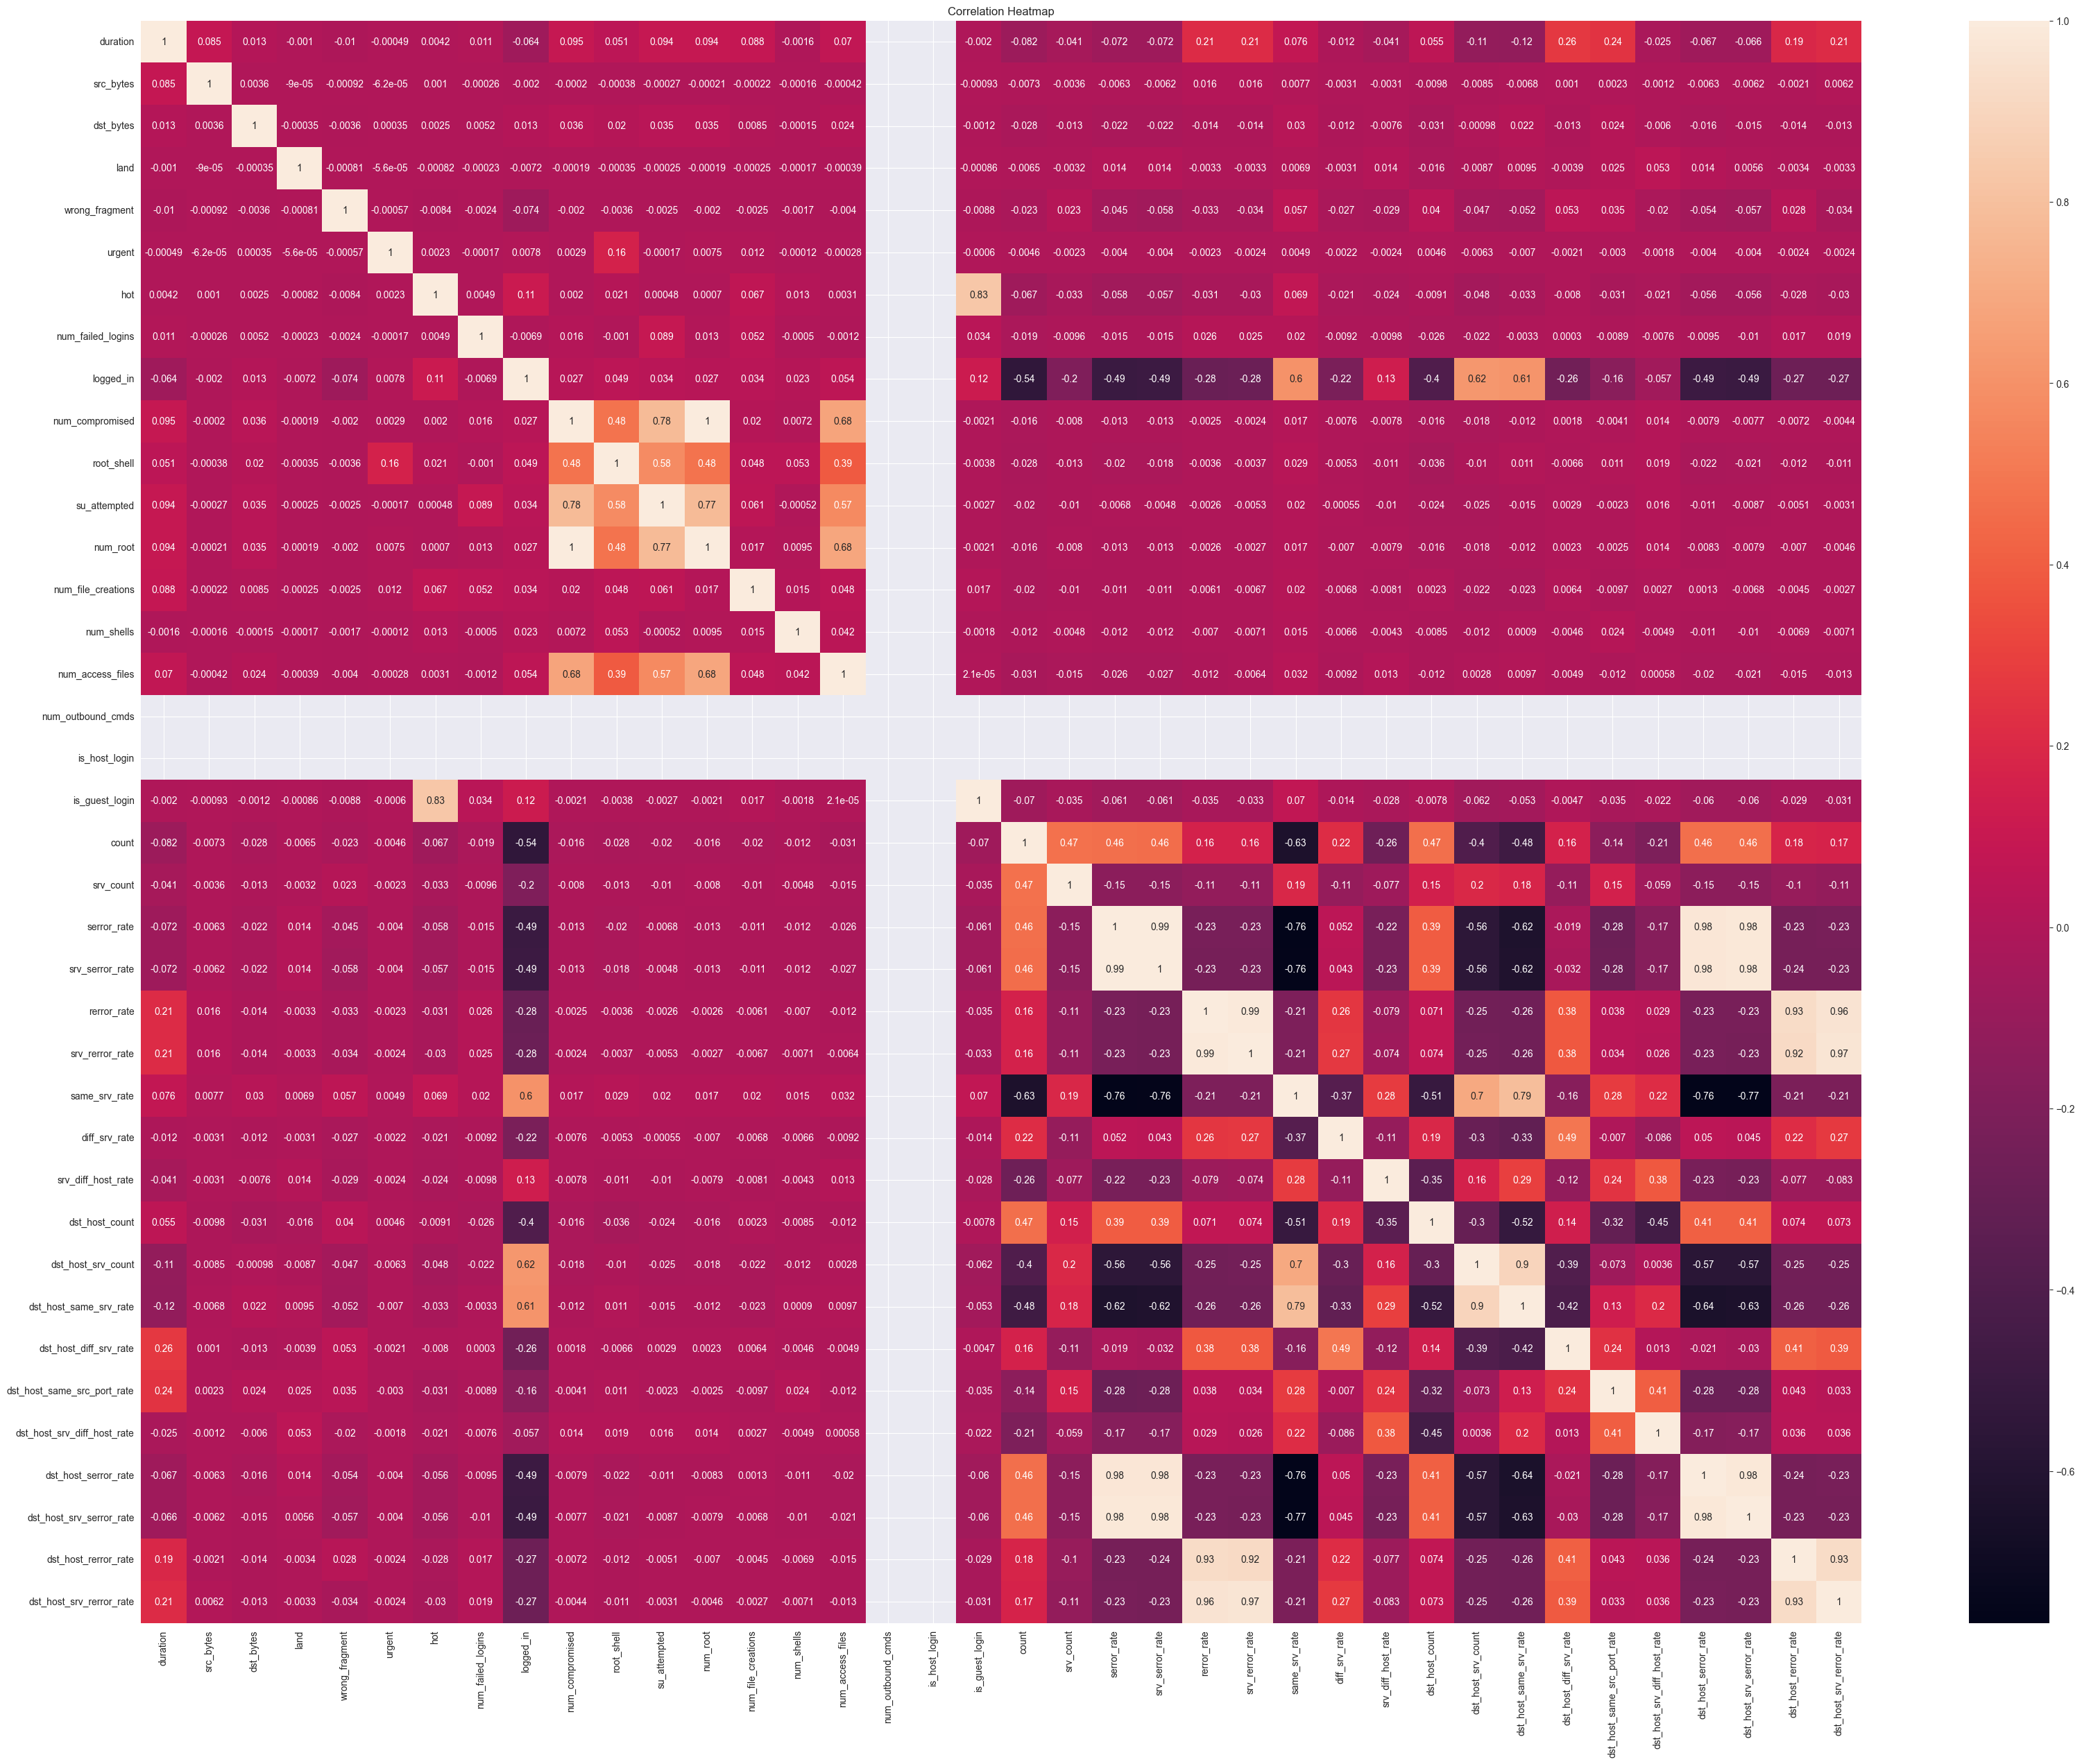

In [1081]:
plt.figure(figsize=(40,30))
sns.heatmap(nids_original_dataframe.corr(numeric_only=True),annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
similar_related

In [1082]:
single_value_features = []

for col in nids_original_dataframe.columns:
    if len(nids_original_dataframe[col].unique()) == 1:
        single_value_features.append(col)

print("Features with only a single value:")
print(single_value_features)


Features with only a single value:
['num_outbound_cmds', 'is_host_login']


In [1083]:

# Drop the single value features from the DataFrame
nids_original_dataframe = nids_original_dataframe.drop(single_value_features, axis=1)


In [1084]:

import pandas as pd

# Assuming df is your DataFrame containing the dataset
# If df is not defined, define it using your actual dataset

# Check for duplicate rows
duplicate_rows = nids_original_dataframe.duplicated()

# Count the number of duplicate rows
num_duplicate_rows = duplicate_rows.sum()

if num_duplicate_rows > 0:
    print("The dataset has duplicate rows.")
    print("Number of duplicate rows:", num_duplicate_rows)
else:
    print("The dataset does not have any duplicate rows.")

The dataset does not have any duplicate rows.


In [1085]:
categorical_columns = nids_original_dataframe.select_dtypes(include=['object']).columns.tolist()
numerical_columns = nids_original_dataframe.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:")
print(categorical_columns)

print("\nNumerical Columns:")
print(numerical_columns)


Categorical Columns:
['protocol_type', 'service', 'flag', 'class']

Numerical Columns:
['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


In [1086]:
for col in categorical_columns:
    print(nids_original_dataframe[col].unique())

['tcp' 'udp' 'icmp']
['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001']
['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']
['normal' 'anomaly']


In [1087]:

numerical_columns = nids_original_dataframe.select_dtypes(exclude=['object']).columns.tolist()


In [1088]:
rows_to_remove_categorical = []
for col in categorical_columns:
    values_to_remove_categorical = nids_original_dataframe[col].value_counts()[nids_original_dataframe[col].value_counts() < 15].index
    rows_to_remove_categorical.extend(nids_original_dataframe[nids_original_dataframe[col].isin(values_to_remove_categorical)].index)

# Remove duplicate indices
rows_to_remove_categorical = list(set(rows_to_remove_categorical))

# Drop the rows containing values with count less than 15
nids_original_dataframe = nids_original_dataframe.drop(rows_to_remove_categorical)

# Reset index after dropping rows
nids_original_dataframe = nids_original_dataframe.reset_index(drop=True)

# Display the updated DataFrame
print(nids_original_dataframe.shape)


(25151, 40)


In [1089]:
for col in categorical_columns:
    print(nids_original_dataframe[col].unique())

['tcp' 'udp' 'icmp']
['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'netbios_ssn' 'rje' 'X11']
['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2']
['normal' 'anomaly']


In [1090]:
import pandas as pd

# Assuming nids_original_dataframe is your DataFrame containing the data
categorical_col = nids_original_dataframe.select_dtypes(exclude=['number']).columns.tolist()
for col in categorical_col:
    print("Column:", col)
    print(nids_original_dataframe[col].value_counts())

Column: protocol_type
protocol_type
tcp     20494
udp      3011
icmp     1646
Name: count, dtype: int64
Column: service
service
http           8002
private        4349
domain_u       1820
smtp           1448
ftp_data       1396
eco_i           909
other           858
ecr_i           613
telnet          483
finger          366
ftp             345
auth            189
Z39_50          172
courier         164
uucp            157
time            155
bgp             146
whois           145
imap4           138
uucp_path       132
iso_tsap        131
ctf             127
urp_i           124
nnsp            123
supdup          114
http_443        113
csnet_ns        111
efs             110
gopher          109
domain          109
daytime         107
vmnet           107
discard         105
hostnames        96
klogin           92
name             92
exec             91
mtp              90
ldap             90
systat           88
link             85
netbios_dgm      85
login            79
netstat     

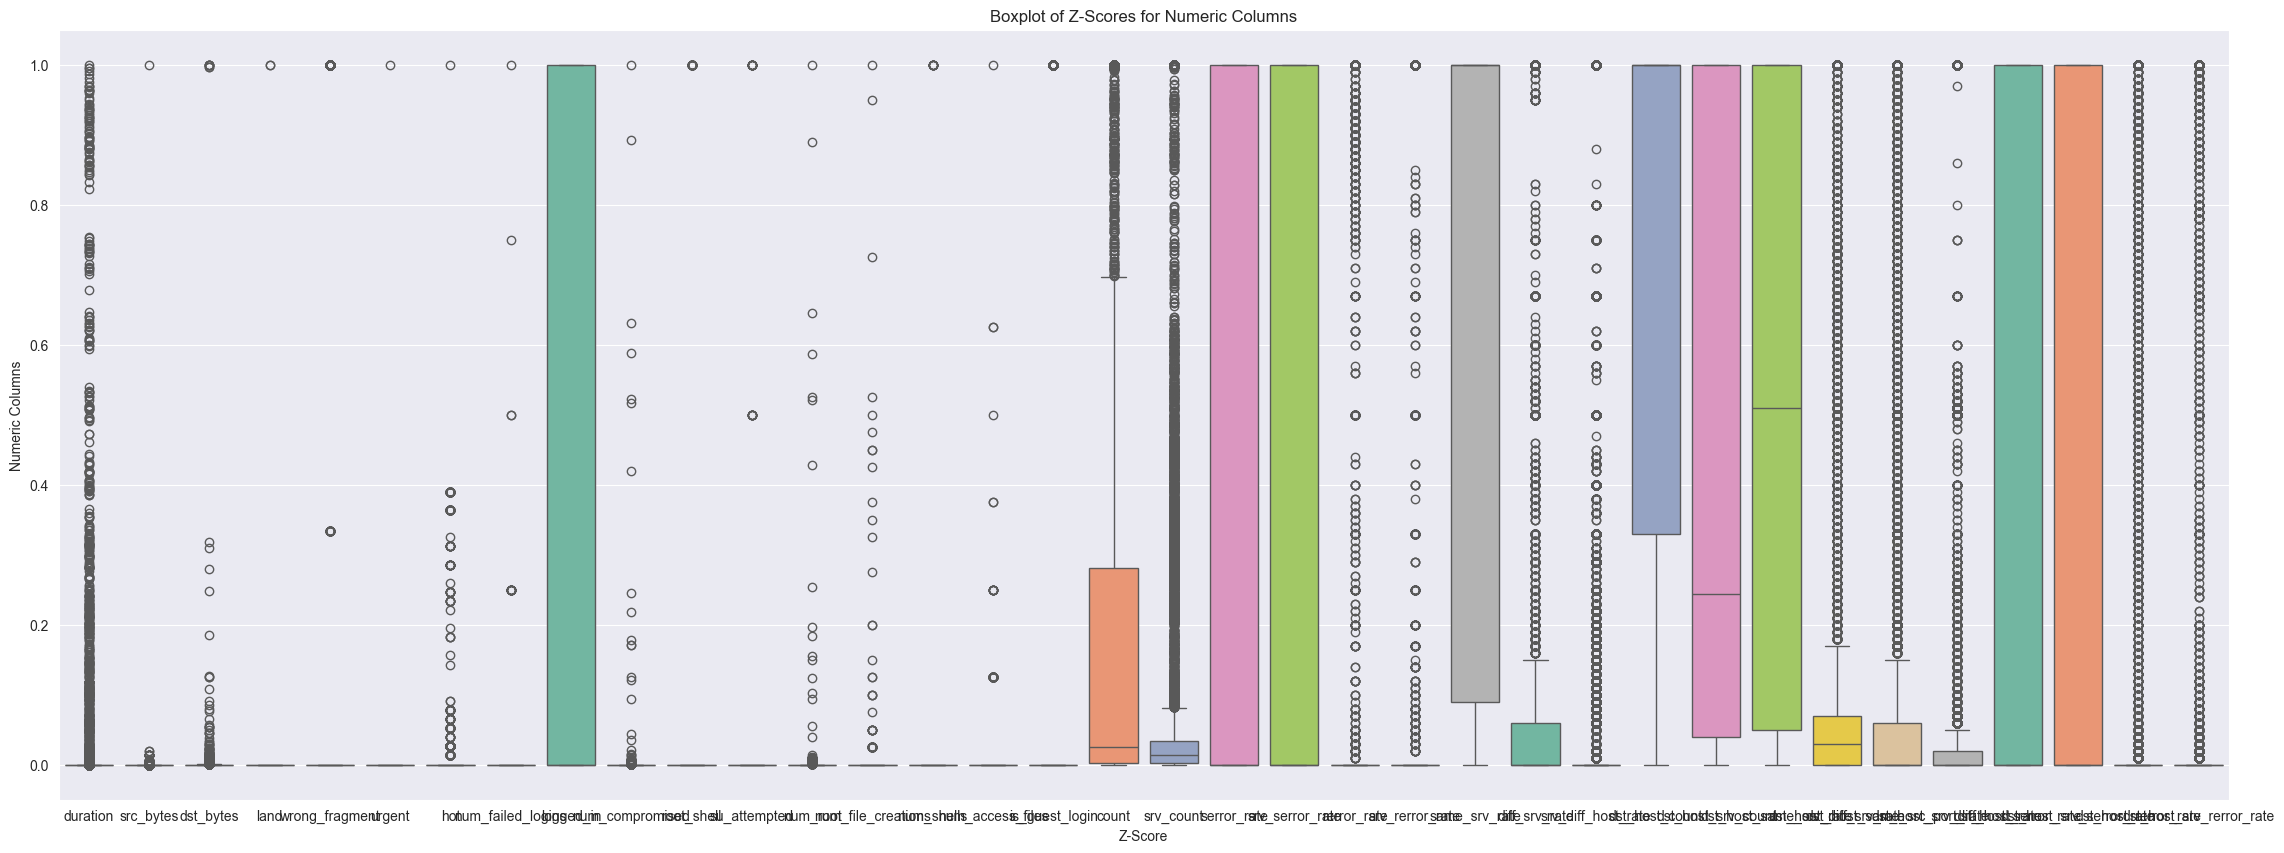

In [1091]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
# Calculate z-scores for each numeric column

nids_numeric = nids_original_dataframe.copy()
nids_numeric = nids_numeric.select_dtypes(include=['number'])
z_scores = stats.zscore(nids_numeric)

# Create a DataFrame of z-scores
z_scores_df = pd.DataFrame(z_scores, columns=nids_numeric.columns)




# Instantiate MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to your data and transform the data
scaled_data = scaler.fit_transform(z_scores_df)

# Create a DataFrame of the scaled data
scaled_data_df = pd.DataFrame(scaled_data, columns=z_scores_df.columns)

# Set up the boxplot figure for scaled data
plt.figure(figsize=(28, 10))

# Draw boxplots for each numeric column
sns.boxplot(data=scaled_data_df, orient='v', palette='Set2')

# Add title and labels
plt.title('Boxplot of Z-Scores for Numeric Columns')
plt.xlabel('Z-Score')
plt.ylabel('Numeric Columns')

# Display the plot
plt.show()

threshold = 3
abs_z_scores = np.abs(z_scores)
# Find rows with any z-score exceeding the threshold
# print("Total data row count =>", nids_original_dataframe.shape[0])
outlier_rows = nids_original_dataframe[(abs_z_scores > threshold).any(axis=1)]
# print("Outlier row count =>", outlier_rows.shape[0])


In [1092]:
# We only take the data with no outliers
nids_original_dataframe = nids_original_dataframe[(abs_z_scores < threshold).all(axis=1)]


In [1093]:
print(nids_original_dataframe.shape)

(20596, 40)


In [1094]:
print(nids_original_dataframe.info())

<class 'pandas.core.frame.DataFrame'>
Index: 20596 entries, 0 to 25150
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     20596 non-null  int64  
 1   protocol_type                20596 non-null  object 
 2   service                      20596 non-null  object 
 3   flag                         20596 non-null  object 
 4   src_bytes                    20596 non-null  int64  
 5   dst_bytes                    20596 non-null  int64  
 6   land                         20596 non-null  int64  
 7   wrong_fragment               20596 non-null  int64  
 8   urgent                       20596 non-null  int64  
 9   hot                          20596 non-null  int64  
 10  num_failed_logins            20596 non-null  int64  
 11  logged_in                    20596 non-null  int64  
 12  num_compromised              20596 non-null  int64  
 13  root_shell           

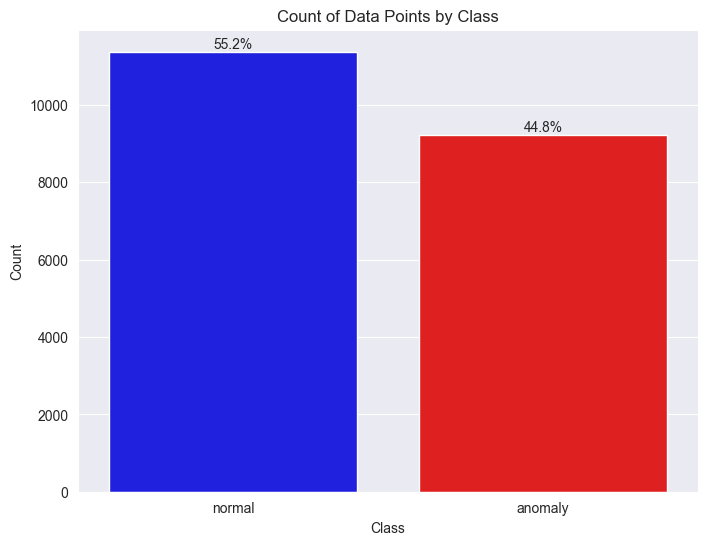

class
normal     11371
anomaly     9225
Name: count, dtype: int64


In [1095]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create countplot with color for each class
plt.figure(figsize=(8, 6))
sns.countplot(x='class', hue='class', data=nids_original_dataframe, palette=['blue', 'red'], legend=False)
plt.title('Count of Data Points by Class')
plt.xlabel('Class')
plt.ylabel('Count')

# Add percentage annotations
total_points = len(nids_original_dataframe)
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 0.1,
             '{:.1f}%'.format((height / total_points) * 100),
             ha='center', va='bottom')

plt.show()
print(nids_original_dataframe['class'].value_counts())

In [1096]:
from sklearn.preprocessing import LabelEncoder

# Assuming nids_original_dataframe is your DataFrame

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
nids_original_dataframe['class'] = label_encoder.fit_transform(nids_original_dataframe['class'])



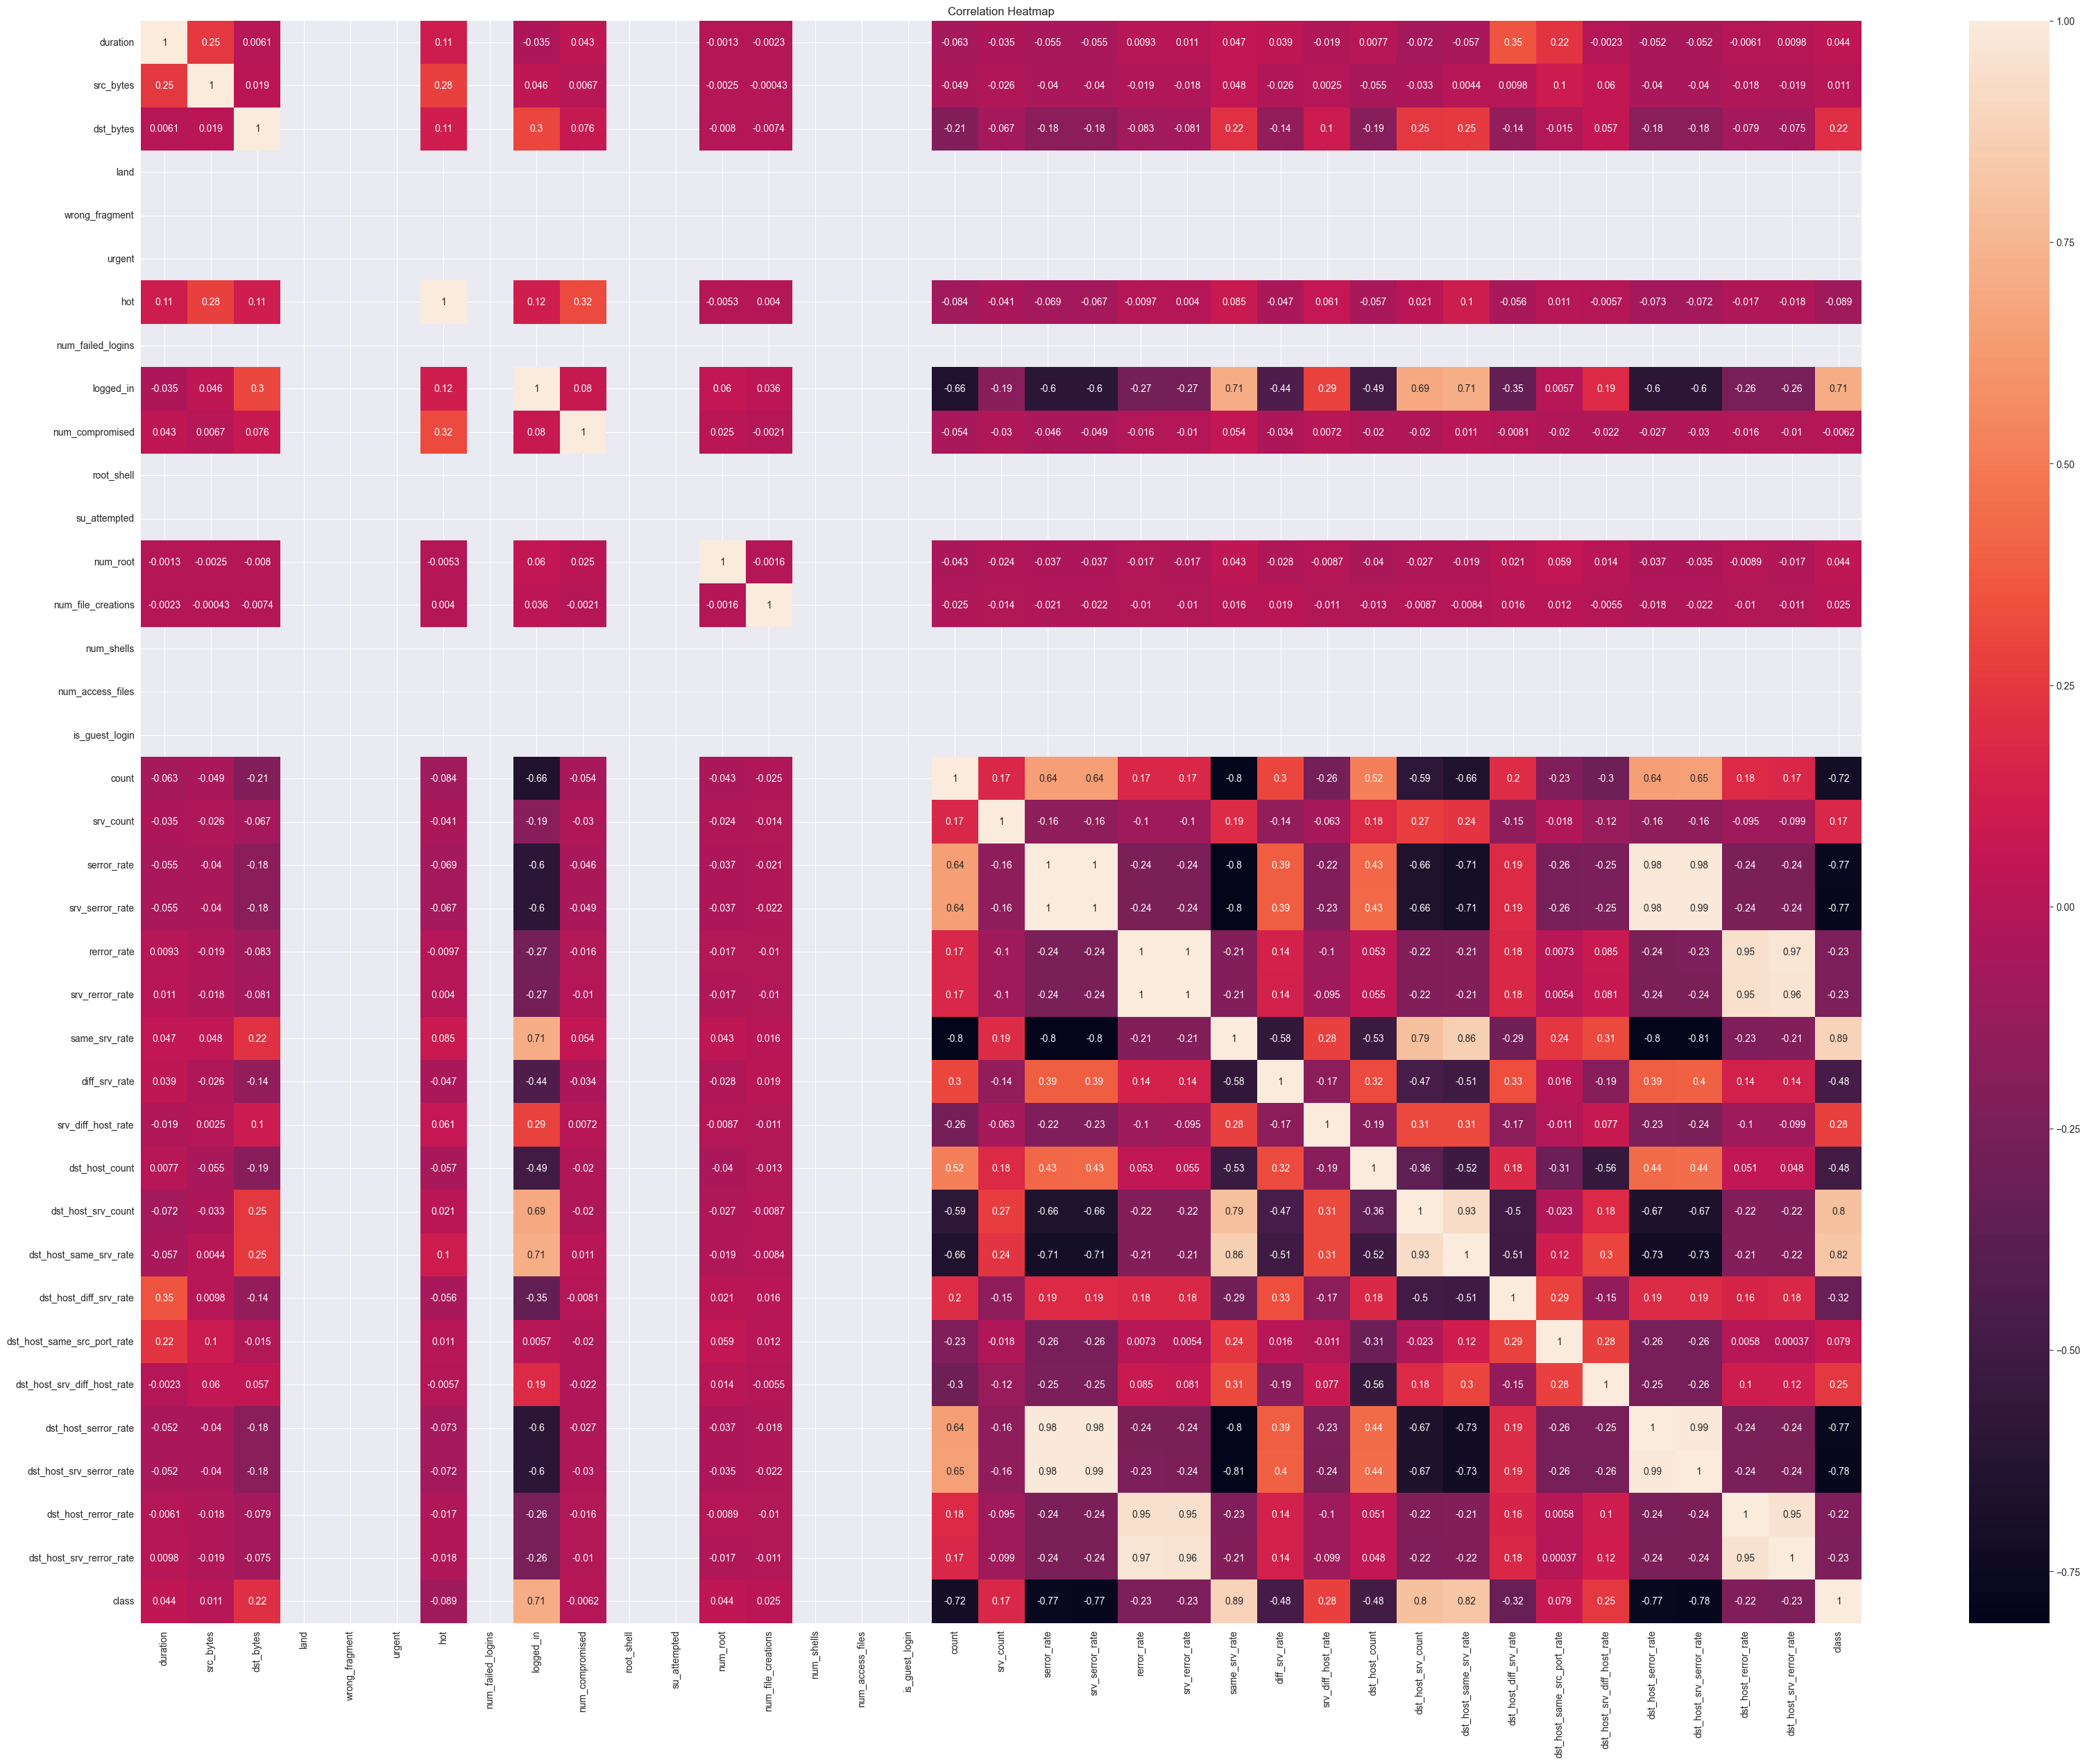

In [1097]:
plt.figure(figsize=(40,30))
sns.heatmap(nids_original_dataframe.corr(numeric_only=True),annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [1098]:
from sklearn.feature_selection import mutual_info_classif
nids_num = nids_original_dataframe.select_dtypes(include=['number'])
X_val = nids_num.drop(['class'], axis=1)
y_val = nids_original_dataframe['class']
mutual_info = mutual_info_classif(X_val,y_val)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_val.columns
mutual_info.sort_values(ascending=False)


src_bytes                      0.572365
diff_srv_rate                  0.508605
same_srv_rate                  0.498285
dst_bytes                      0.450279
dst_host_same_srv_rate         0.434179
dst_host_srv_count             0.427650
dst_host_diff_srv_rate         0.403691
dst_host_serror_rate           0.376596
dst_host_srv_serror_rate       0.376366
serror_rate                    0.369003
srv_serror_rate                0.366106
count                          0.357585
logged_in                      0.300006
dst_host_srv_diff_host_rate    0.183501
dst_host_count                 0.162457
dst_host_same_src_port_rate    0.153265
srv_diff_host_rate             0.111379
srv_count                      0.090501
dst_host_srv_rerror_rate       0.054817
dst_host_rerror_rate           0.035235
srv_rerror_rate                0.031605
rerror_rate                    0.026658
duration                       0.013650
land                           0.010697
num_compromised                0.007602


In [1099]:
selected_features = mutual_info[mutual_info >=0.2]

# Convert the selected features to a list
significant_features = selected_features.index.tolist()
insignicant_features = mutual_info[mutual_info <0.2]
insignificant_features = insignicant_features.index.tolist()


<Axes: >

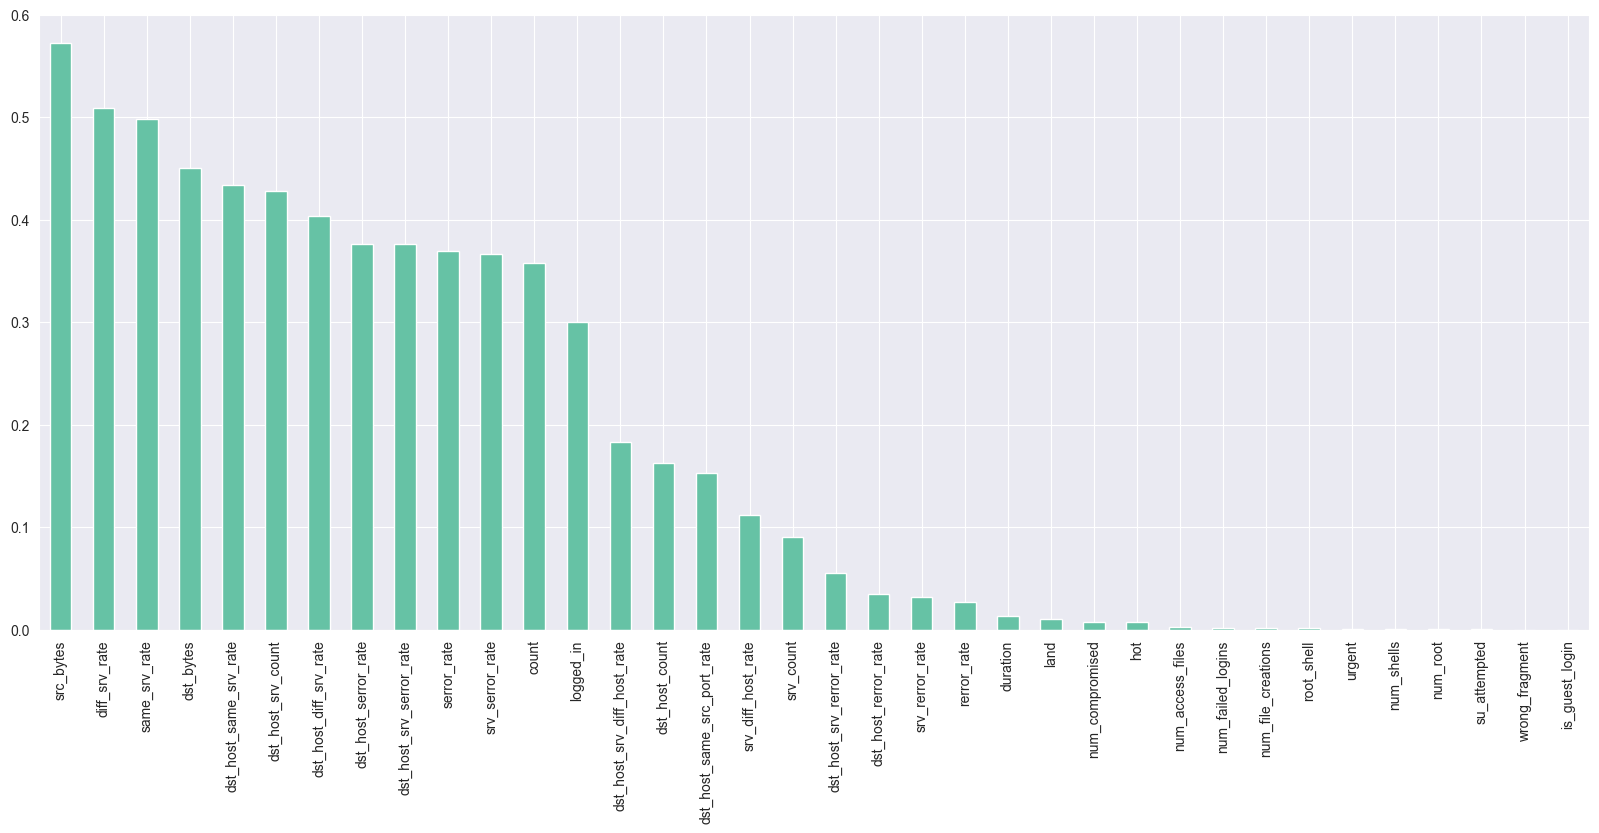

In [1100]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [1101]:
print(insignificant_features)

['duration', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'is_guest_login', 'srv_count', 'rerror_rate', 'srv_rerror_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


In [1102]:

nids_original_dataframe.drop(insignificant_features , axis=1, inplace=True)

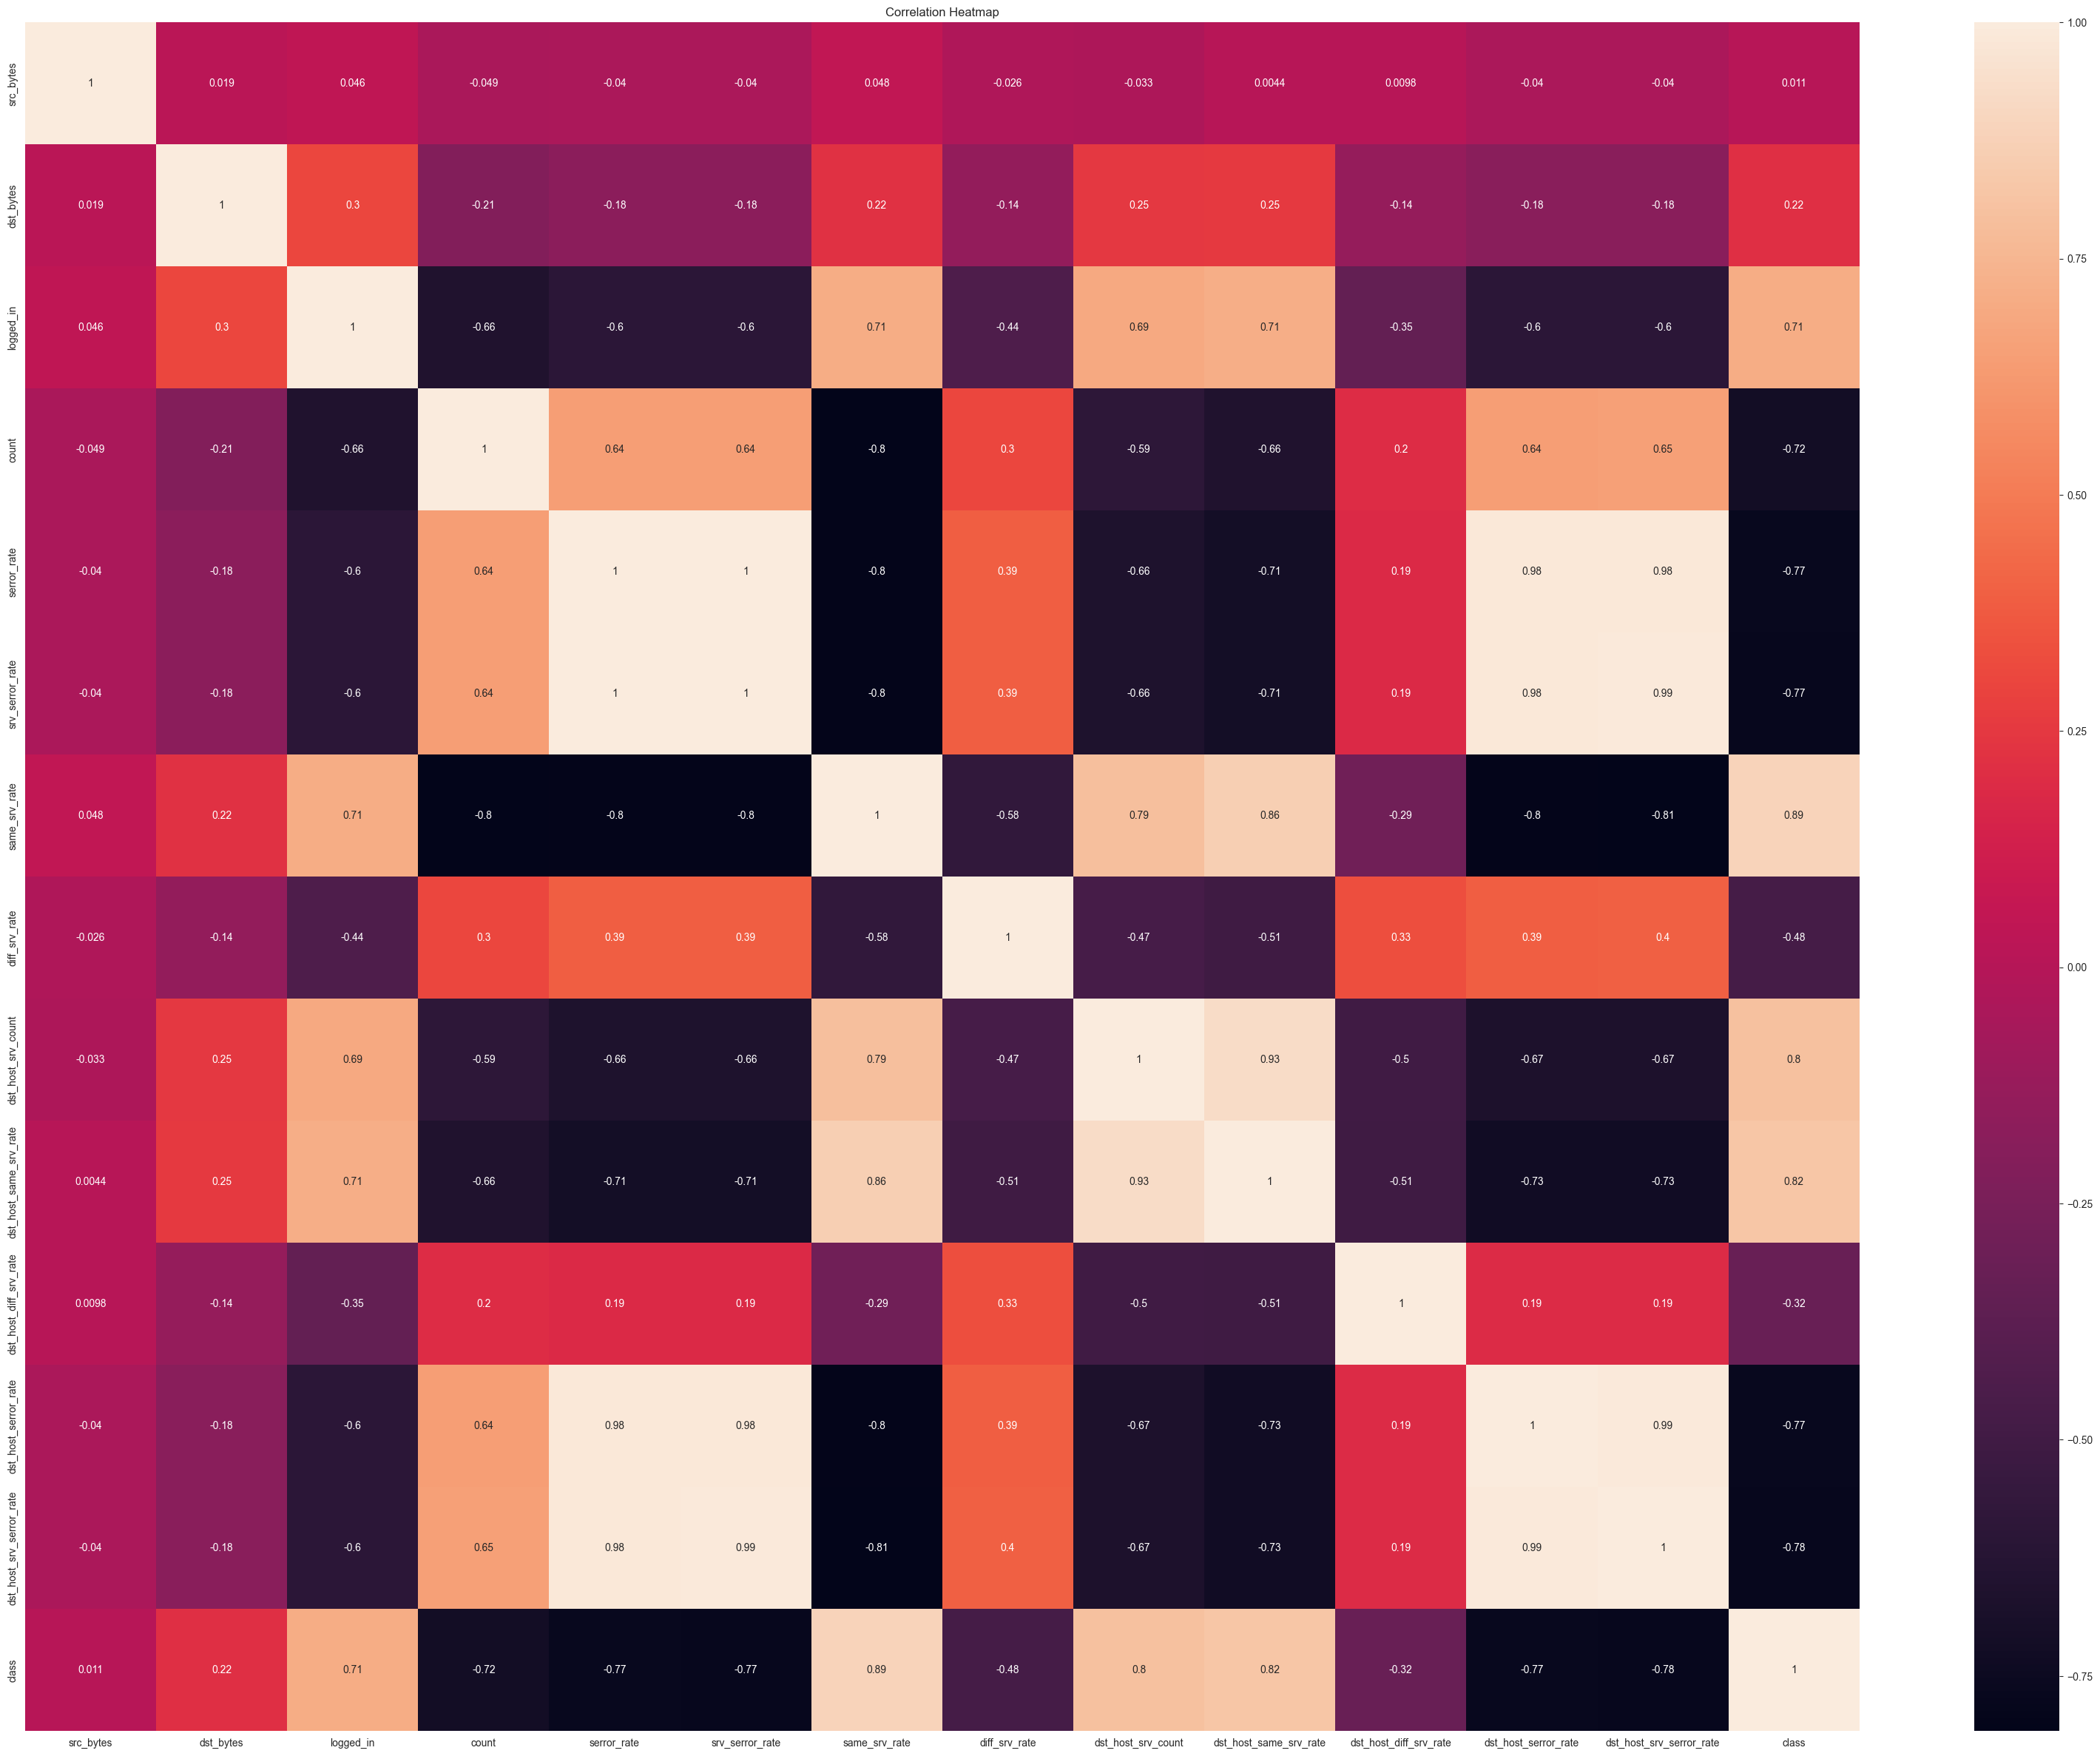

In [1103]:
plt.figure(figsize=(40,30))
sns.heatmap(nids_original_dataframe.corr(numeric_only=True),annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [1104]:
numeric_dataframe = nids_original_dataframe.select_dtypes(include=['number'])
print(numeric_dataframe.info())

<class 'pandas.core.frame.DataFrame'>
Index: 20596 entries, 0 to 25150
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   src_bytes                 20596 non-null  int64  
 1   dst_bytes                 20596 non-null  int64  
 2   logged_in                 20596 non-null  int64  
 3   count                     20596 non-null  int64  
 4   serror_rate               20596 non-null  float64
 5   srv_serror_rate           20596 non-null  float64
 6   same_srv_rate             20596 non-null  float64
 7   diff_srv_rate             20596 non-null  float64
 8   dst_host_srv_count        20596 non-null  int64  
 9   dst_host_same_srv_rate    20596 non-null  float64
 10  dst_host_diff_srv_rate    20596 non-null  float64
 11  dst_host_serror_rate      20596 non-null  float64
 12  dst_host_srv_serror_rate  20596 non-null  float64
 13  class                     20596 non-null  int64  
dtypes: float64(

In [1105]:
significant_features += ['class']
print(significant_features)
# sns.pairplot(nids_original_dataframe[significant_features], hue='class')

['src_bytes', 'dst_bytes', 'logged_in', 'count', 'serror_rate', 'srv_serror_rate', 'same_srv_rate', 'diff_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'class']


In [1106]:
# import matplotlib.pyplot as plt
# import matplotlib.pylab as pylab
# import seaborn as sns

# # Compute min-max normalization
# min_vals = nids_original_dataframe[significant_features].min()
# max_vals = nids_original_dataframe[significant_features].max()
# normalized_data = (nids_original_dataframe[significant_features] - min_vals) / (max_vals - min_vals)

# params = {
#     'legend.fontsize': 'x-large',
#     'figure.figsize': (2, 4),
#     'axes.labelsize': 'x-large',
#     'axes.titlesize': 'x-large',
#     'xtick.labelsize': 'x-large',
#     'ytick.labelsize': 'x-large'
# }
# pylab.rcParams.update(params)

# plt.figure(figsize=(30, 30))

# num_cols = 3
# num_rows = int(normalized_data.shape[1] / num_cols) + 1

# for index, col in enumerate(normalized_data.drop('class', axis=1).columns):
#     plt.subplot(num_rows, num_cols, index + 1)
#     sns.histplot(normalized_data, x=col, hue='class', kde=True, bins=100)

#     # Increase x-axis and y-axis title font size
#     plt.xlabel(col, fontsize=10)
#     plt.ylabel('Count', fontsize=10)

# plt.tight_layout()
# plt.show()


In [1107]:
# from scipy.stats import norm


# # Remove 'class' from the list
# significant_features_copy = significant_features.copy()
# try:
    
#     significant_features_copy.remove('class')
# except:
#     print("")

# significant_feat_df = nids_original_dataframe[significant_features_copy]

# num_features = len(significant_feat_df.columns)
# num_rows = int(np.ceil(num_features**0.5))
# num_cols = int(np.ceil(num_features / num_rows))

# # Plot histogram subplots
# fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 16))

# for i, col in enumerate(significant_feat_df.columns):
#     ax = axes[i // num_cols, i % num_cols]
#     ax.hist(significant_feat_df[col], bins=10, color='skyblue', edgecolor='black', density=True)
#     ax.set_title(col)

#     # Fit a normal distribution to the data
#     mu, std = norm.fit(significant_feat_df[col])
    
#     # Plot the normal distribution curve
#     xmin, xmax = ax.get_xlim()
#     x = np.linspace(xmin, xmax, 100)
#     p = norm.pdf(x, mu, std)
#     ax.plot(x, p, 'k', linewidth=1)

# # Hide any empty subplots
# for j in range(num_features, num_rows * num_cols):
#     axes.flatten()[j].axis('off')

# plt.tight_layout()
# plt.show()

In [1108]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(32, 32))

# num_cols = 5
# num_rows = int(nids_original_dataframe[significant_features].shape[1] / num_cols) + 1

# for index, col in enumerate(nids_original_dataframe[significant_features].drop('class', axis=1).columns):
#     plt.subplot(num_rows, num_cols, index + 1)
#     sns.scatterplot(data=nids_original_dataframe[significant_features], x=col, y='class', hue=nids_original_dataframe['class'], legend=False)

#     # Increase x-axis and y-axis title font size
#     plt.xlabel(col, fontsize=20)
#     plt.ylabel('class', fontsize=20)

# plt.tight_layout()
# plt.show()


In [1109]:
print(nids_original_dataframe['class'])

0        1
1        1
2        0
3        1
4        1
        ..
25146    0
25147    0
25148    0
25149    0
25150    0
Name: class, Length: 20596, dtype: int64


In [1110]:
print(nids_original_dataframe.head())

  protocol_type   service flag  src_bytes  dst_bytes  logged_in  count  \
0           tcp  ftp_data   SF        491          0          0      2   
1           udp     other   SF        146          0          0     13   
2           tcp   private   S0          0          0          0    123   
3           tcp      http   SF        232       8153          1      5   
4           tcp      http   SF        199        420          1     30   

   serror_rate  srv_serror_rate  same_srv_rate  diff_srv_rate  \
0          0.0              0.0           1.00           0.00   
1          0.0              0.0           0.08           0.15   
2          1.0              1.0           0.05           0.07   
3          0.2              0.2           1.00           0.00   
4          0.0              0.0           1.00           0.00   

   dst_host_srv_count  dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                  25                    0.17                    0.03   
1                 

In [1111]:
print(nids_original_dataframe.info())

<class 'pandas.core.frame.DataFrame'>
Index: 20596 entries, 0 to 25150
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   protocol_type             20596 non-null  object 
 1   service                   20596 non-null  object 
 2   flag                      20596 non-null  object 
 3   src_bytes                 20596 non-null  int64  
 4   dst_bytes                 20596 non-null  int64  
 5   logged_in                 20596 non-null  int64  
 6   count                     20596 non-null  int64  
 7   serror_rate               20596 non-null  float64
 8   srv_serror_rate           20596 non-null  float64
 9   same_srv_rate             20596 non-null  float64
 10  diff_srv_rate             20596 non-null  float64
 11  dst_host_srv_count        20596 non-null  int64  
 12  dst_host_same_srv_rate    20596 non-null  float64
 13  dst_host_diff_srv_rate    20596 non-null  float64
 14  dst_host_se

In [1112]:
# # Perform one-hot encoding for nominal categorical columns
categorical_columns = nids_original_dataframe.select_dtypes(exclude=['number']).columns.tolist()
print(categorical_columns)


# print("Initialization of One-hot Encoding")
# nids_original_dataframe = pd.get_dummies(nids_original_dataframe, columns=[)
# nids_original_dataframe = nids_original_dataframe.map(lambda x: 1 if x == True else (0 if x == False else x))
# print("One-hot Encoding Completed")


print("Initialing Label Encoding")
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
    
    # Apply LabelEncoder to each column with categorical values
for column in nids_original_dataframe.columns:
    if nids_original_dataframe[column].dtype == 'object':  # Check if the column contains categorical values
        nids_original_dataframe[column] = label_encoder.fit_transform(nids_original_dataframe[column])
print("Label Encoding Completed")


['protocol_type', 'service', 'flag']
Initialing Label Encoding
Label Encoding Completed


In [1113]:
print(nids_original_dataframe.shape)

(20596, 17)


In [1114]:
print("Extended Columns list after One hot Encoding=>",nids_original_dataframe.columns.tolist())

Extended Columns list after One hot Encoding=> ['protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'logged_in', 'count', 'serror_rate', 'srv_serror_rate', 'same_srv_rate', 'diff_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'class']


In [1115]:
#re-indexing of target column which changed during transformation

column_name = 'class'
column_index = nids_original_dataframe.columns.get_loc(column_name)
# Moved 'class' column moved to the last position
new_column_order = list(nids_original_dataframe.columns[:column_index]) + list(nids_original_dataframe.columns[column_index+1:]) + [column_name]

# Reindex the DataFrame with the new column order
nids_original_dataframe = nids_original_dataframe.reindex(columns=new_column_order)



In [1116]:
print(nids_original_dataframe.head())

   protocol_type  service  flag  src_bytes  dst_bytes  logged_in  count  \
0              1       19     8        491          0          0      2   
1              2       40     8        146          0          0     13   
2              1       43     4          0          0          0    123   
3              1       22     8        232       8153          1      5   
4              1       22     8        199        420          1     30   

   serror_rate  srv_serror_rate  same_srv_rate  diff_srv_rate  \
0          0.0              0.0           1.00           0.00   
1          0.0              0.0           0.08           0.15   
2          1.0              1.0           0.05           0.07   
3          0.2              0.2           1.00           0.00   
4          0.0              0.0           1.00           0.00   

   dst_host_srv_count  dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                  25                    0.17                    0.03   
1           

In [1117]:
nids_original_dataframe.info()


<class 'pandas.core.frame.DataFrame'>
Index: 20596 entries, 0 to 25150
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   protocol_type             20596 non-null  int64  
 1   service                   20596 non-null  int64  
 2   flag                      20596 non-null  int64  
 3   src_bytes                 20596 non-null  int64  
 4   dst_bytes                 20596 non-null  int64  
 5   logged_in                 20596 non-null  int64  
 6   count                     20596 non-null  int64  
 7   serror_rate               20596 non-null  float64
 8   srv_serror_rate           20596 non-null  float64
 9   same_srv_rate             20596 non-null  float64
 10  diff_srv_rate             20596 non-null  float64
 11  dst_host_srv_count        20596 non-null  int64  
 12  dst_host_same_srv_rate    20596 non-null  float64
 13  dst_host_diff_srv_rate    20596 non-null  float64
 14  dst_host_se

In [1118]:
print(nids_original_dataframe.info())

<class 'pandas.core.frame.DataFrame'>
Index: 20596 entries, 0 to 25150
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   protocol_type             20596 non-null  int64  
 1   service                   20596 non-null  int64  
 2   flag                      20596 non-null  int64  
 3   src_bytes                 20596 non-null  int64  
 4   dst_bytes                 20596 non-null  int64  
 5   logged_in                 20596 non-null  int64  
 6   count                     20596 non-null  int64  
 7   serror_rate               20596 non-null  float64
 8   srv_serror_rate           20596 non-null  float64
 9   same_srv_rate             20596 non-null  float64
 10  diff_srv_rate             20596 non-null  float64
 11  dst_host_srv_count        20596 non-null  int64  
 12  dst_host_same_srv_rate    20596 non-null  float64
 13  dst_host_diff_srv_rate    20596 non-null  float64
 14  dst_host_se

In [1119]:


categorical_columns = nids_original_dataframe.select_dtypes(exclude=['number']).columns.tolist()
print(categorical_columns)

catego_df = pd.DataFrame()
for col in categorical_columns:
    catego_df[col] = nids_original_dataframe[col]

print(catego_df)

[]
Empty DataFrame
Columns: []
Index: []


In [1120]:
dataset_target = nids_original_dataframe['class'].values
dataset_features = nids_original_dataframe.drop(['class'], axis=1)



In [1121]:
print(nids_original_dataframe.info())

<class 'pandas.core.frame.DataFrame'>
Index: 20596 entries, 0 to 25150
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   protocol_type             20596 non-null  int64  
 1   service                   20596 non-null  int64  
 2   flag                      20596 non-null  int64  
 3   src_bytes                 20596 non-null  int64  
 4   dst_bytes                 20596 non-null  int64  
 5   logged_in                 20596 non-null  int64  
 6   count                     20596 non-null  int64  
 7   serror_rate               20596 non-null  float64
 8   srv_serror_rate           20596 non-null  float64
 9   same_srv_rate             20596 non-null  float64
 10  diff_srv_rate             20596 non-null  float64
 11  dst_host_srv_count        20596 non-null  int64  
 12  dst_host_same_srv_rate    20596 non-null  float64
 13  dst_host_diff_srv_rate    20596 non-null  float64
 14  dst_host_se

In [1122]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataset_features_standardized = scaler.fit_transform(dataset_features)

In [1123]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit_transform(dataset_features_standardized)

array([[ 1.06505005e+00, -8.43068976e-01,  9.71003248e-03, ...,
         1.11000649e-01, -4.50912504e-02, -9.50382717e-03],
       [-1.33374794e+00, -6.60092226e+00,  1.09906560e+00, ...,
         1.78393863e-02,  5.23179606e-02,  1.86696711e-02],
       [-3.60019397e+00,  6.55535772e-01,  2.32262709e-01, ...,
        -1.65602186e-02, -5.25803158e-03,  1.05286057e-03],
       ...,
       [-1.35425947e+00, -2.08718431e+00,  1.22778400e+00, ...,
         7.19140692e-03,  5.71794315e-03,  3.52545017e-03],
       [-3.50184678e+00,  6.66353677e-01,  1.85691809e-02, ...,
        -1.51719071e-02, -1.32585046e-02, -6.46587434e-04],
       [-2.89906836e+00,  9.43634141e-01, -5.45142107e-01, ...,
        -4.14342406e-02, -2.10681065e-02, -9.64205960e-04]])

In [1124]:
pca.n_components_

16

In [1125]:
pca.explained_variance_ratio_

array([5.12523747e-01, 9.70707489e-02, 7.57929239e-02, 6.29105991e-02,
       5.64899110e-02, 5.33058531e-02, 4.24165744e-02, 3.91847260e-02,
       2.21654931e-02, 1.71966046e-02, 1.09773911e-02, 4.36794503e-03,
       3.19183430e-03, 1.50365541e-03, 6.88481541e-04, 2.13511451e-04])

In [1126]:
pca.get_covariance()

array([[ 1.00004856, -0.14713096,  0.20316849, -0.01467443, -0.06287313,
        -0.21361685, -0.00879259, -0.18120404, -0.18065568,  0.1727479 ,
        -0.02072043,  0.15409735,  0.15549208,  0.10860302, -0.18050925,
        -0.17827294],
       [-0.14713096,  1.00004856, -0.29992576, -0.03767874, -0.09246298,
        -0.20798434,  0.18386063,  0.31550255,  0.31692959, -0.38173183,
         0.27018702, -0.41195448, -0.42223124,  0.29701264,  0.31960191,
         0.31930132],
       [ 0.20316849, -0.29992576,  1.00004856,  0.04562013,  0.20445277,
         0.67847383, -0.6195379 , -0.51443426, -0.51454534,  0.77104175,
        -0.40049388,  0.66400505,  0.6971043 , -0.26029681, -0.50484719,
        -0.50990793],
       [-0.01467443, -0.03767874,  0.04562013,  1.00004856,  0.0193048 ,
         0.04550478, -0.04895462, -0.04018746, -0.03963573,  0.04826998,
        -0.02604621, -0.03328297,  0.00441137,  0.00976308, -0.04045271,
        -0.04033162],
       [-0.06287313, -0.09246298,  0

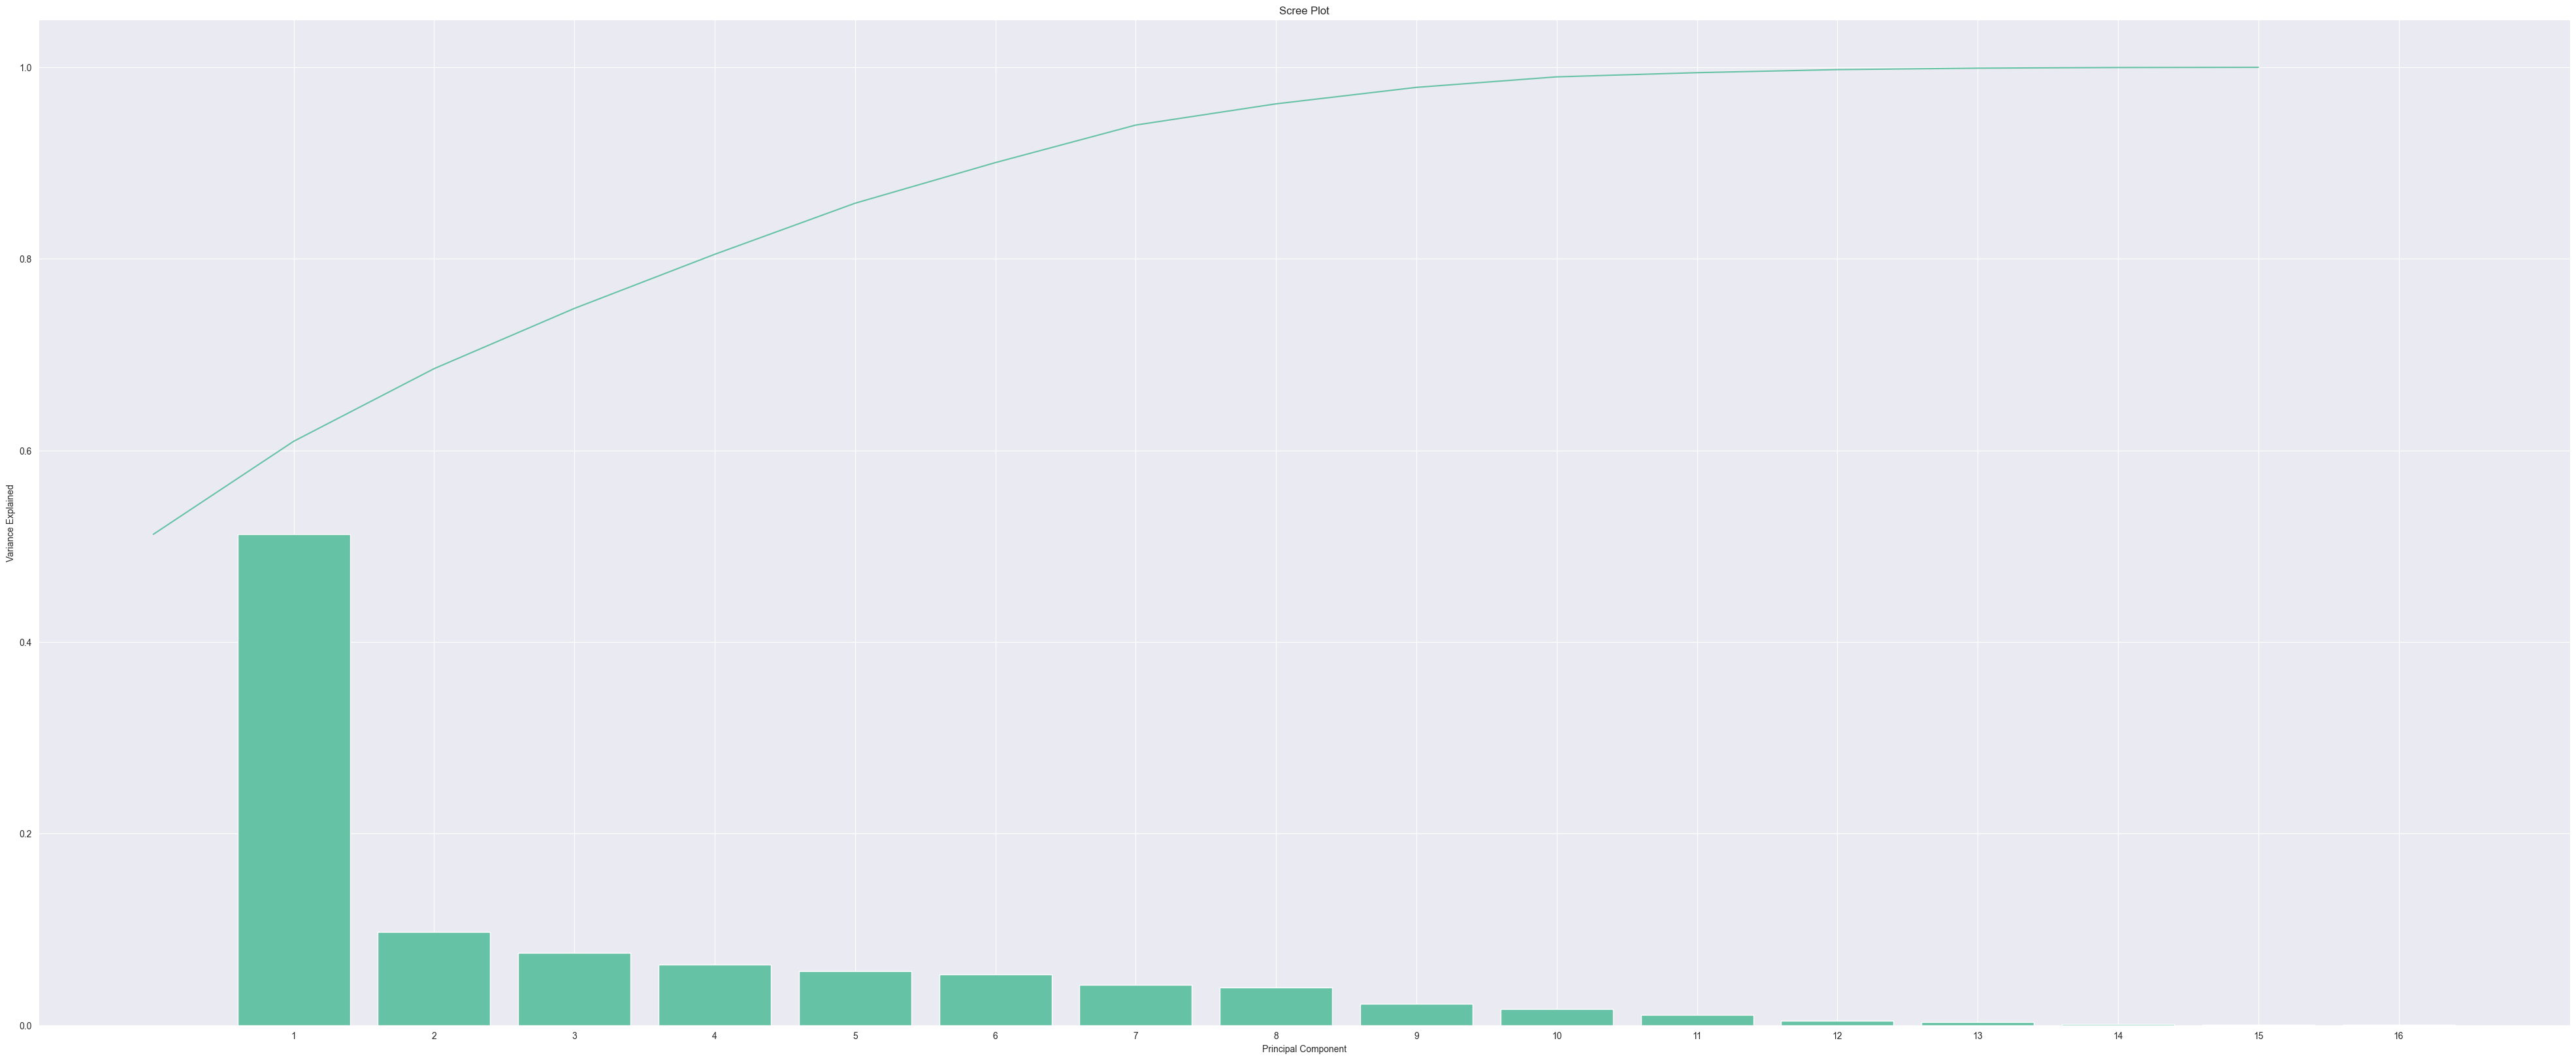

In [1127]:
# Scree plot: Cumulative Explained Variance
fig, ax = plt.subplots(figsize=(50, 20))
plt.bar(range(1, pca.n_components_+1), pca.explained_variance_ratio_)
plt.xticks(range(1, pca.n_components_+1))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [1128]:
# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative Variance:",cumulative_variance)

# Choose the number of components that capture a specified percentage of variance
target_variance = 0.90
num_components = np.argmax(cumulative_variance >= target_variance) + 1

print(f'The number of components to capture {target_variance * 100}% variance: {num_components}')



Cumulative Variance: [0.51252375 0.6095945  0.68538742 0.74829802 0.80478793 0.85809378
 0.90051036 0.93969508 0.96186058 0.97905718 0.99003457 0.99440252
 0.99759435 0.99909801 0.99978649 1.        ]
The number of components to capture 90.0% variance: 7


In [1129]:
# Use the selected number of components for further analysis or dimensionality reduction
final_pca = PCA(n_components=num_components,random_state=42)
nids_original_dataframe_pca = final_pca.fit_transform(dataset_features_standardized)

In [1130]:
components = final_pca.components_.T

reduced_df_pca_columns = ['PC'+str(item) for item in range(0,num_components)]
nids_reduced_df = pd.DataFrame(nids_original_dataframe_pca, columns=reduced_df_pca_columns)
print(nids_reduced_df.head())


        PC0       PC1       PC2       PC3       PC4       PC5       PC6
0  1.065050 -0.843069  0.009710  0.136388 -0.545250  0.024417 -0.315076
1 -1.333748 -6.600922  1.099066 -0.045132  3.362264 -1.211760 -0.127979
2 -3.600194  0.655536  0.232263 -0.104982  0.291571 -0.556390  0.011875
3  2.650043  1.090098  0.299404 -0.112155  0.562923  0.199001  0.105061
4  2.752809  0.527558  0.005218 -0.135056 -0.421769 -0.401978  0.184939


In [1131]:
print(nids_reduced_df.shape)

(20596, 7)


In [1132]:
nids_reduced_df['class'] = dataset_target

merged_df = nids_reduced_df.copy()

print(merged_df.info())

In [1133]:
y = merged_df['class'].values
X = merged_df.drop(['class'], axis=1)

In [1134]:
# Splitting the dataset into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, shuffle=True, random_state=42)  

In [1135]:
print(X_train.values)

[[-3.79240399e+00  7.61568153e-01 -9.64323664e-01 ... -1.47926656e-01
   5.01724566e-01 -9.01822238e-02]
 [ 2.83312233e+00  5.27232384e-01  7.61955553e-02 ... -3.81253280e-01
  -4.83050073e-01  2.50562811e-01]
 [ 2.06619236e+00 -1.21409082e+00 -2.94703967e+00 ...  5.93465995e-01
   1.96349239e-01 -2.33015241e-01]
 ...
 [ 2.73987058e+00 -6.68577015e-01  5.10495082e+00 ... -1.50194423e+00
  -9.13781086e-01  8.45147596e-01]
 [ 2.75832295e+00  5.20656792e-01  5.36667478e-03 ... -4.36127812e-01
  -4.28921973e-01  1.95333080e-01]
 [-6.74372660e-02 -5.63029144e+00  5.85798124e-01 ...  3.00767032e+00
  -1.70287545e+00 -2.16310426e+00]]


#### Logistic Regression

In [1136]:

from sklearn.linear_model import LogisticRegression
# Create the logistic regression model
logre = LogisticRegression(solver='liblinear')


**10 Fold Cross Validaton for Logistic Regression**

In [1137]:
from sklearn.model_selection import cross_val_score
# Perform 10-fold cross-validation
cv_scores = cross_val_score(logre, X_train, y_train, cv=5, scoring='accuracy')
# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
# Fit the model on the entire dataset


Cross-validation scores: [0.95110957 0.95527046 0.95248006 0.95109261 0.95352064]
Mean cross-validation score: 0.9526946666647422


In [1138]:
logre.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [1139]:
# Predict the class for the test data (using the entire dataset)
y_pred = logre.predict(X_test)

In [1140]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9600258941576307


In [1141]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      2768
           1       0.95      0.98      0.96      3411

    accuracy                           0.96      6179
   macro avg       0.96      0.96      0.96      6179
weighted avg       0.96      0.96      0.96      6179



In [1142]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.9571536134369764

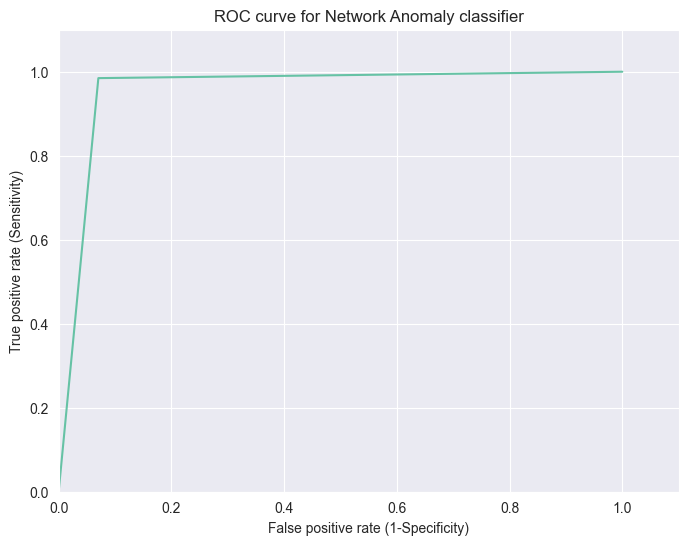

In [1143]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(8,6))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.1])
plt.ylim([0.0, 1.1])
plt.title('ROC curve for Network Anomaly classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

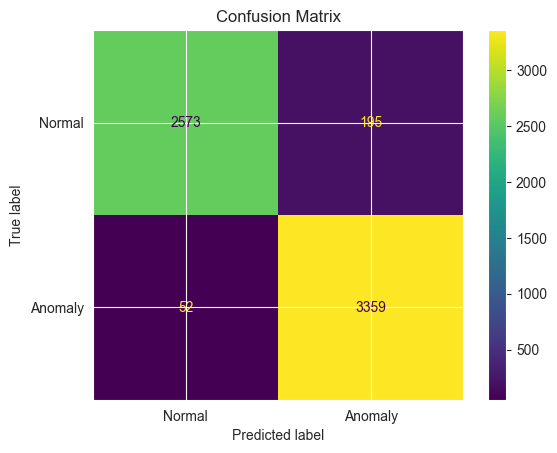

In [1144]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Normal','Anomaly'])
disp.plot(cmap='viridis') 
plt.title('Confusion Matrix')
plt.show()


In [1145]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
%matplotlib inline

sns.set_style('darkgrid')
sns.set_palette('Set2')

In [1146]:
clf_dt = DecisionTreeClassifier(random_state=42,criterion='gini', max_depth=None, min_samples_leaf=1, min_samples_split= 2)
clf_dt = clf_dt.fit(X_train, y_train)

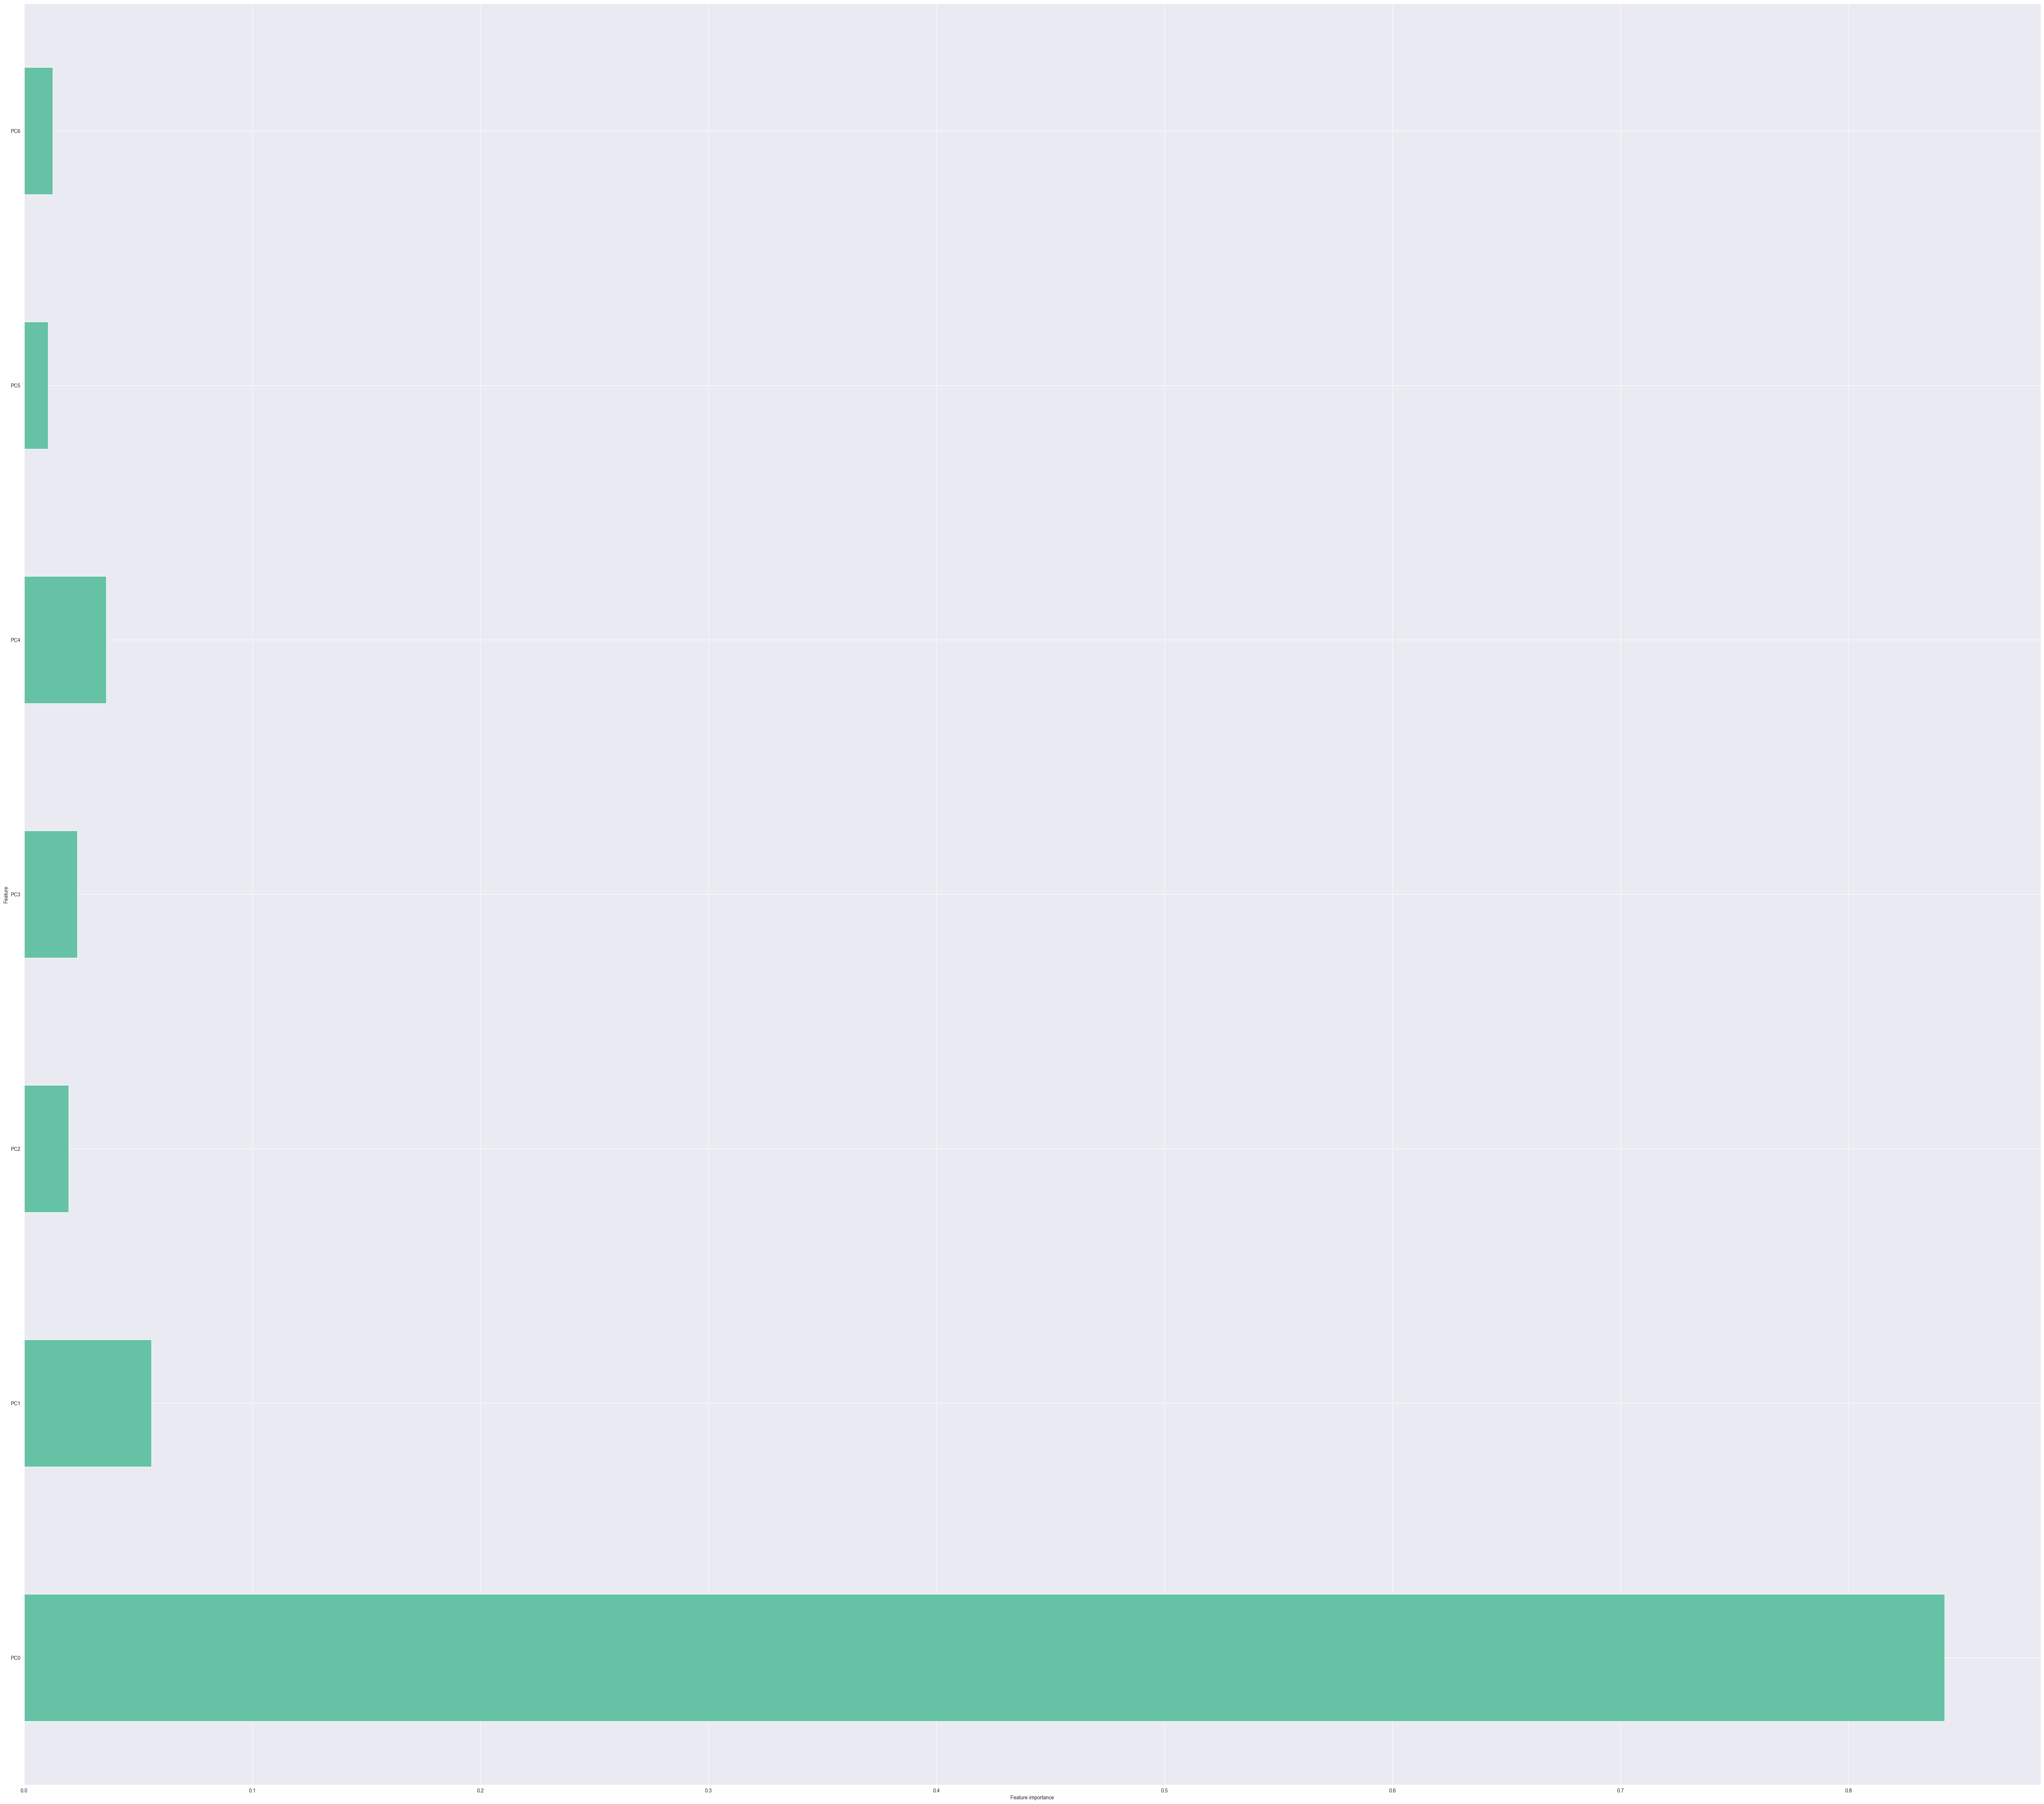

In [1147]:
def plot_feature_importances_(model):
    n_features = X.shape[1]
    plt.figure(figsize=(72, 64))  # Increase the figure size
    bar_width = 0.5  # Adjust the width of the bars
    plt.barh(np.arange(n_features), model.feature_importances_, height=bar_width, align='center')  # Adjust the height
    plt.yticks(np.arange(n_features), X.columns, fontsize=10)  # Adjust fontsize
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-0.5, n_features - 0.5)  # Adjust ylim for better spacing

plot_feature_importances_(clf_dt)


In [1148]:
from tqdm import tqdm
# Extracting the different values of alpha that are available for this tree and 
# Build a pruned tree for each value of ccp_alpha
path = clf_dt.cost_complexity_pruning_path(X_train, y_train) # Determine values for alpha
# Omit the maximum value for alpha, because it would prune all leaves, leaving us with only the root of the tree 
ccp_alphas = path.ccp_alphas[:-1] # Extract different values for alpha and omit the maximum value 
print(ccp_alphas)
clf_dts = [] # Creating an array to store the created decision trees 

# For each value for alpha, create a decision tree and store it in the clf_dts array 
for ccp_alpha in tqdm(ccp_alphas, desc="Progress"):
    clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

[0.00000000e+00 4.95446844e-05 5.20219186e-05 5.20219186e-05
 5.54900465e-05 5.94536212e-05 6.24263023e-05 6.47383876e-05
 6.68853239e-05 6.69707457e-05 6.70504728e-05 6.75372276e-05
 6.81666519e-05 6.82065155e-05 6.82438072e-05 6.82615651e-05
 6.86758001e-05 6.93156915e-05 6.93497912e-05 6.93625581e-05
 7.01061022e-05 7.03804910e-05 8.58774529e-05 9.16400238e-05
 9.24834108e-05 9.24834108e-05 9.24834108e-05 9.24834108e-05
 1.04043837e-04 1.04043837e-04 1.04043837e-04 1.04043837e-04
 1.05046797e-04 1.07897313e-04 1.10980093e-04 1.10980093e-04
 1.10980093e-04 1.10980093e-04 1.18159690e-04 1.24545086e-04
 1.24852605e-04 1.31711836e-04 1.31940473e-04 1.32693589e-04
 1.34321144e-04 1.37975251e-04 1.46931267e-04 1.52572168e-04
 1.58542990e-04 1.63372173e-04 1.66470139e-04 1.77259871e-04
 1.84966822e-04 1.95445122e-04 2.10688770e-04 2.18185492e-04
 2.20719380e-04 2.29672060e-04 2.52110455e-04 2.57847770e-04
 2.66486955e-04 2.67872426e-04 2.93598129e-04 3.07974314e-04
 3.10626821e-04 3.405071

Progress: 100%|█████████████████████████████████| 87/87 [00:06<00:00, 13.49it/s]


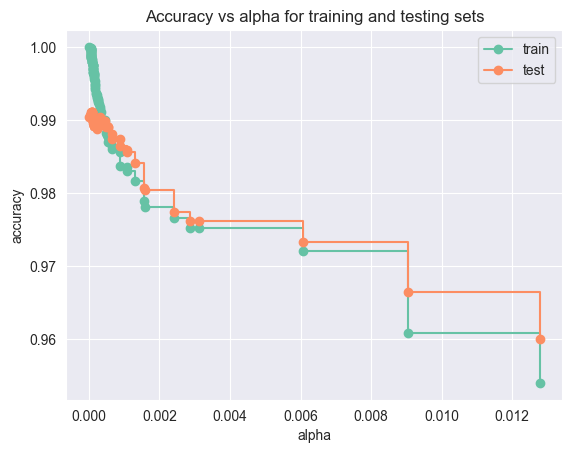

In [1149]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for training and testing sets')
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

<Axes: xlabel='tree'>

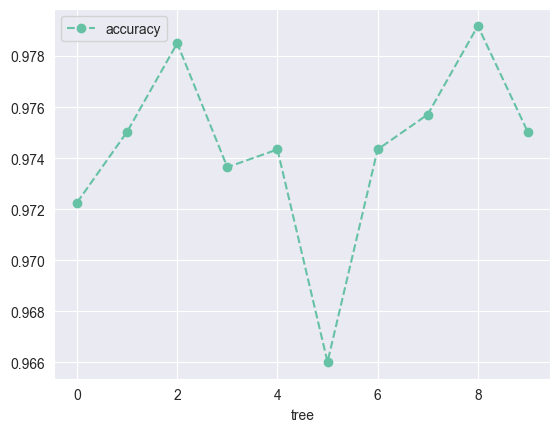

In [1150]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.003)

scores = cross_val_score(clf_dt, X_train, y_train, cv=10)
df = pd.DataFrame(data={'tree': range(10), 'accuracy': scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

Cross-validation Progress: 100%|████████████████| 87/87 [00:58<00:00,  1.49it/s]


<Axes: xlabel='alpha'>

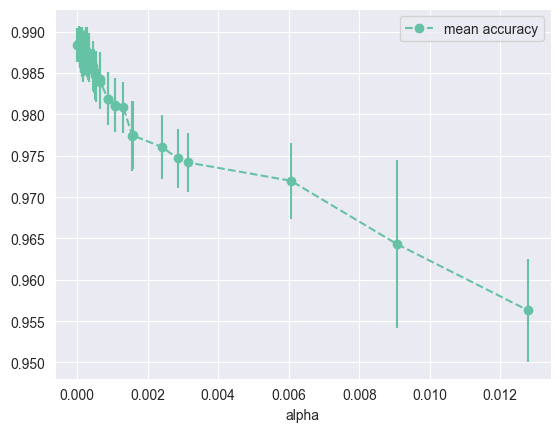

In [1151]:
from tqdm import tqdm

# Create a list to store the results of each fold during cross validation 
alpha_loop_values = []

# For each candidate value for alpha, we run 10-fold cross validation.
# Then, we will store the mean and standard deviation of the scores (the accuracy) 
# for each call cross_val_score in alpha_loop_values list

# Use tqdm to create a progress bar
for ccp_alpha in tqdm(ccp_alphas, desc='Cross-validation Progress'):
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=10)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
# Now we can visualize the means and standard deviations of the scores for each candidate of alpha
alpha_results = pd.DataFrame(alpha_loop_values,
                             columns=['alpha', 'mean accuracy', 'std'])

alpha_results.plot(
    x='alpha',
    y='mean accuracy',
    yerr='std',
    marker='o',
    linestyle='--'
)


In [1152]:
alpha_results['mean accuracy'].max()


0.9886248376984312

In [1153]:
alpha_results['mean accuracy'].idxmax()

5

In [1154]:
ideal_ccpa_alpha = alpha_results.iloc[alpha_results['mean accuracy'].idxmax()]['alpha']
ideal_ccpa_alpha

5.9453621220979214e-05

In [1155]:
clf_dt = DecisionTreeClassifier(random_state=42, criterion='gini',ccp_alpha=ideal_ccpa_alpha)
clf_dt = clf_dt.fit(X_train, y_train)

[Text(0.3823752332089552, 0.96875, 'PC0 <= -0.309\ngini = 0.495\nsamples = 14417\nvalue = [6457, 7960]\nclass = Anomaly'),
 Text(0.253847947761194, 0.90625, 'PC2 <= 3.053\ngini = 0.04\nsamples = 6042\nvalue = [5918.0, 124.0]\nclass = Normal'),
 Text(0.22411380597014927, 0.84375, 'PC4 <= 3.354\ngini = 0.025\nsamples = 5989\nvalue = [5914, 75]\nclass = Normal'),
 Text(0.18703358208955223, 0.78125, 'PC6 <= 4.557\ngini = 0.018\nsamples = 5966\nvalue = [5913.0, 53.0]\nclass = Normal'),
 Text(0.13526119402985073, 0.71875, 'PC0 <= -0.702\ngini = 0.01\nsamples = 5882\nvalue = [5852, 30]\nclass = Normal'),
 Text(0.06902985074626866, 0.65625, 'PC5 <= -1.329\ngini = 0.005\nsamples = 5810\nvalue = [5794, 16]\nclass = Normal'),
 Text(0.029850746268656716, 0.59375, 'PC6 <= -1.178\ngini = 0.291\nsamples = 34\nvalue = [28, 6]\nclass = Normal'),
 Text(0.014925373134328358, 0.53125, 'PC1 <= -5.397\ngini = 0.32\nsamples = 5\nvalue = [1, 4]\nclass = Anomaly'),
 Text(0.007462686567164179, 0.46875, 'gini = 

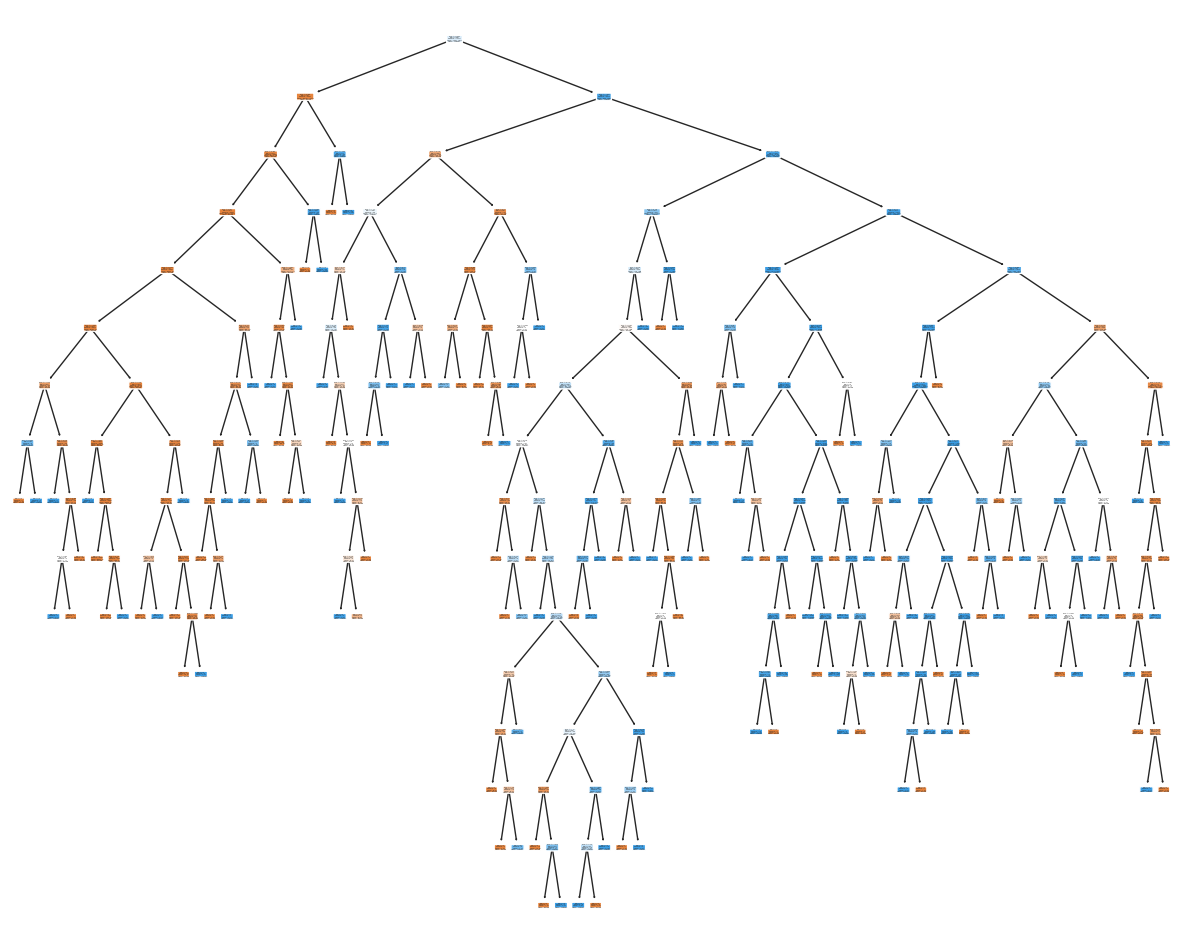

In [1156]:
plt.figure(figsize=(15, 12))
plot_tree(clf_dt, 
          filled=True, 
          rounded=True, 
          class_names=["Normal", "Anomaly"], 
          feature_names=X.columns)

In [1157]:
y_pred = clf_dt.predict(X_test)

In [1158]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.9904515293736851

In [1159]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2768
           1       0.99      0.99      0.99      3411

    accuracy                           0.99      6179
   macro avg       0.99      0.99      0.99      6179
weighted avg       0.99      0.99      0.99      6179



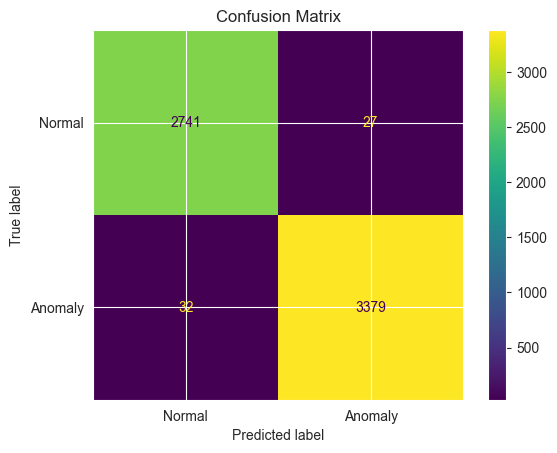

In [1160]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Normal','Anomaly'])
disp.plot(cmap='viridis') 
plt.title('Confusion Matrix')
plt.show()


### RandomForest Classifier

In [1161]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=500) 
clf_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [1162]:
y_pred = clf_rf.predict(X_test)

In [1163]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.9930409451367536

In [1164]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2768
           1       0.99      0.99      0.99      3411

    accuracy                           0.99      6179
   macro avg       0.99      0.99      0.99      6179
weighted avg       0.99      0.99      0.99      6179



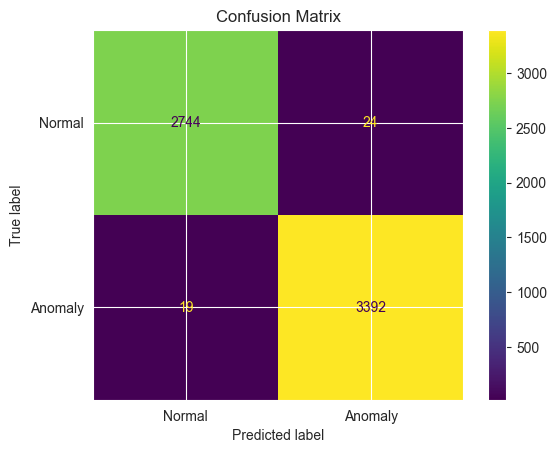

In [1165]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Normal','Anomaly'])
disp.plot(cmap='viridis') 
plt.title('Confusion Matrix')
plt.show()


### K-Nearest neighbor Classifier

In [1166]:
from sklearn.ensemble import RandomForestClassifier

In [1167]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the range of k values to search over
param_grid = {'n_neighbors': range(2, 21)} 

# Create a KNN classifier
knn = KNeighborsClassifier()

# Use GridSearchCV to find the best k value
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameter (k value)
best_k = grid_search.best_params_['n_neighbors']

print("Best k value:", best_k)


Best k value: 3


In [1168]:

knn = KNeighborsClassifier(n_neighbors=best_k) 

# Train the model using the training sets
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Model accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9923935911959864


In [1169]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2768
           1       0.99      0.99      0.99      3411

    accuracy                           0.99      6179
   macro avg       0.99      0.99      0.99      6179
weighted avg       0.99      0.99      0.99      6179



### SVM

In [1170]:
y = merged_df['class'].values
X = merged_df.drop(['class'], axis=1)

In [1171]:
# Splitting the dataset into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)  

In [1172]:
from sklearn.svm import SVC

# Create SVM classifier
svm_classifier = SVC(kernel = 'linear')




In [1173]:
svm_classifier.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = svm_classifier.predict(X_test)

# Model accuracy
accuracy = accuracy_score(y_test, y_pred)
# print('Best Parameters:', best_params)
print('Accuracy:', accuracy)

Accuracy: 0.9556562550574527


In [1174]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      2768
           1       0.94      0.99      0.96      3411

    accuracy                           0.96      6179
   macro avg       0.96      0.95      0.95      6179
weighted avg       0.96      0.96      0.96      6179



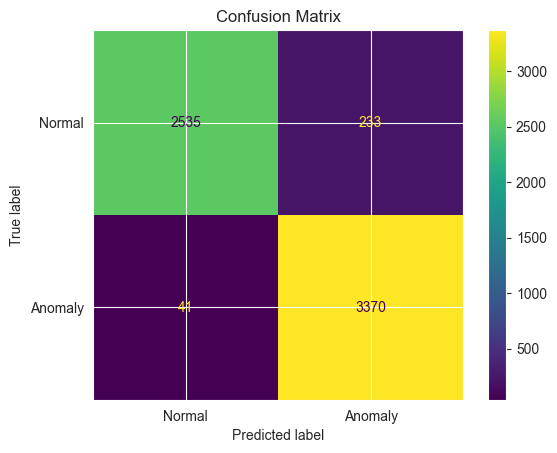

In [1175]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Normal','Anomaly'])
disp.plot(cmap='viridis') 
plt.title('Confusion Matrix')
plt.show()


### Gaussian Naive Bayes 

In [1176]:
from sklearn.naive_bayes import GaussianNB
# GAUSSIAN NAIVE BAYES
gnb = GaussianNB()

In [1177]:
# Train the model using the training sets
gnb.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = gnb.predict(X_test)

# Model accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9475643307978637


In [1178]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2768
           1       0.95      0.96      0.95      3411

    accuracy                           0.95      6179
   macro avg       0.95      0.95      0.95      6179
weighted avg       0.95      0.95      0.95      6179



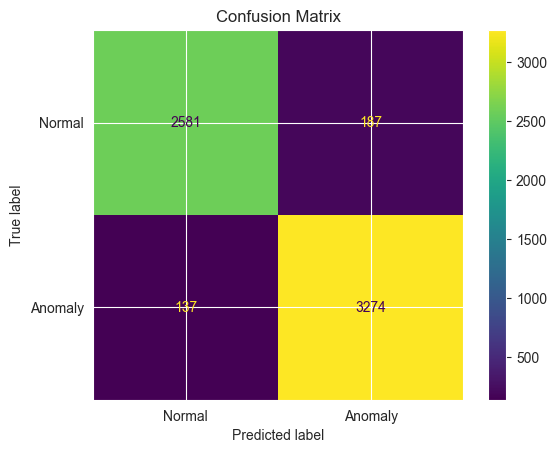

In [1179]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Normal','Anomaly'])
disp.plot(cmap='viridis') 
plt.title('Confusion Matrix')
plt.show()


In [1180]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Define parameter distribution
param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': np.logspace(-4, 0, 5),
}

# Perform Randomized Search
random_search = RandomizedSearchCV(MLPClassifier(max_iter=1000, random_state=42, early_stopping=True), param_dist, cv=4, n_iter=5)
random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)

# Evaluate model with best parameters
best_model = random_search.best_estimator_
print(best_model)
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)

Best Parameters: {'solver': 'adam', 'hidden_layer_sizes': (50, 50), 'alpha': 0.001, 'activation': 'relu'}
MLPClassifier(alpha=0.001, early_stopping=True, hidden_layer_sizes=(50, 50),
              max_iter=1000, random_state=42)
Best Model Accuracy: 0.9904515293736851


In [1181]:
from sklearn.neural_network import MLPClassifier

# Create MLP Classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=random_search.best_params_['hidden_layer_sizes'] ,
                               activation=random_search.best_params_['activation'],
                               solver=random_search.best_params_['solver'],
                               max_iter=500,
                               alpha=random_search.best_params_['alpha'],
                               early_stopping=True,
                               random_state=42)

mlp_classifier.fit(X_train, y_train)

MLPClassifier(alpha=0.001, early_stopping=True, hidden_layer_sizes=(50, 50),
              max_iter=500, random_state=42)

In [1182]:
from sklearn.metrics import accuracy_score

# Predictions
y_pred = mlp_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9904515293736851


In [1183]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2768
           1       0.99      0.99      0.99      3411

    accuracy                           0.99      6179
   macro avg       0.99      0.99      0.99      6179
weighted avg       0.99      0.99      0.99      6179



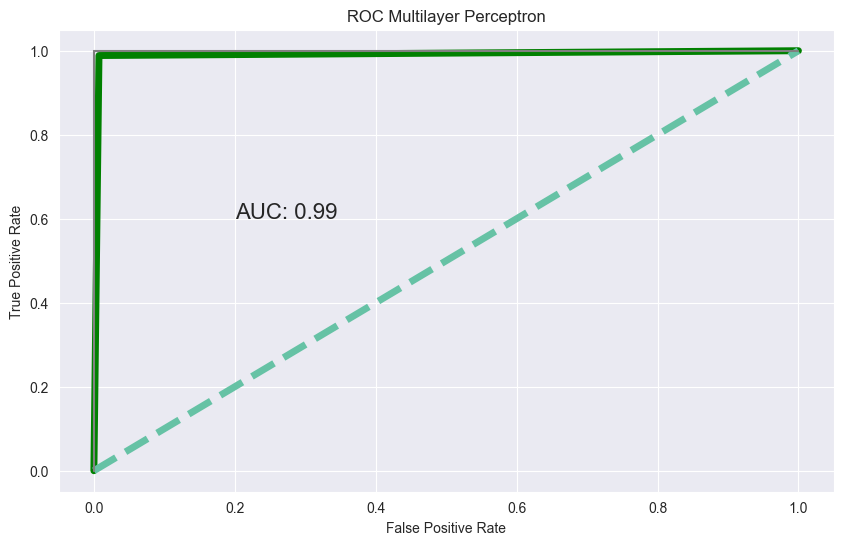

In [1184]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_pred)
plt.figure(figsize=(10,6))
plt.title('ROC Multilayer Perceptron')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_pred)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

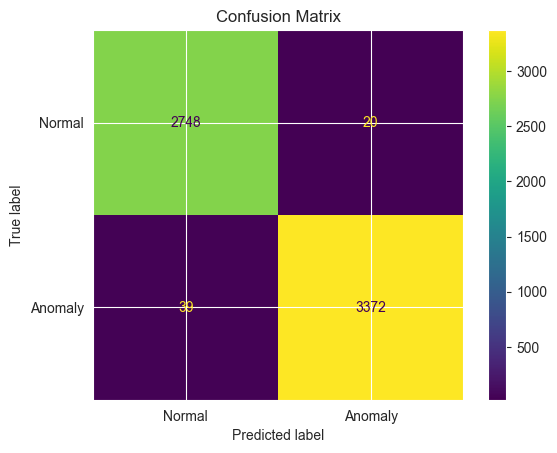

In [1185]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Normal','Anomaly'])
disp.plot(cmap='viridis') 
plt.title('Confusion Matrix')
plt.show()


In [1186]:

models = {"Logistic Reg":logre, "Decision Tree": clf_dt, "Random Forest":clf_rf, "K-NN":knn, "SVM":svm_classifier, "Naive-Bayes":gnb, "Multi-Layer Percp":mlp_classifier}
accuracy = accuracy_score(y_test, y_pred)


from sklearn.metrics import confusion_matrix, classification_report, f1_score
def line(model_name,sym="*"):
    return sym*(25-len(model_name)//2)
target_names=["normal","anamoly"]
for model_name, model in models.items():
    print(model_name, model)
    print(line(model_name), model_name, 'Model Testing', line(model_name))
    print(confusion_matrix(y_test,model.predict(X_test) ))
    print(line(model_name,'-'))
    print(classification_report(y_test,model.predict(X_test) , target_names=target_names))
    print(line(model_name, '-'))

Logistic Reg LogisticRegression(solver='liblinear')
******************* Logistic Reg Model Testing *******************
[[2549  219]
 [  65 3346]]
-------------------
              precision    recall  f1-score   support

      normal       0.98      0.92      0.95      2768
     anamoly       0.94      0.98      0.96      3411

    accuracy                           0.95      6179
   macro avg       0.96      0.95      0.95      6179
weighted avg       0.95      0.95      0.95      6179

-------------------
Decision Tree DecisionTreeClassifier(ccp_alpha=5.9453621220979214e-05, random_state=42)
******************* Decision Tree Model Testing *******************
[[2756   12]
 [   8 3403]]
-------------------
              precision    recall  f1-score   support

      normal       1.00      1.00      1.00      2768
     anamoly       1.00      1.00      1.00      3411

    accuracy                           1.00      6179
   macro avg       1.00      1.00      1.00      6179
weighted avg

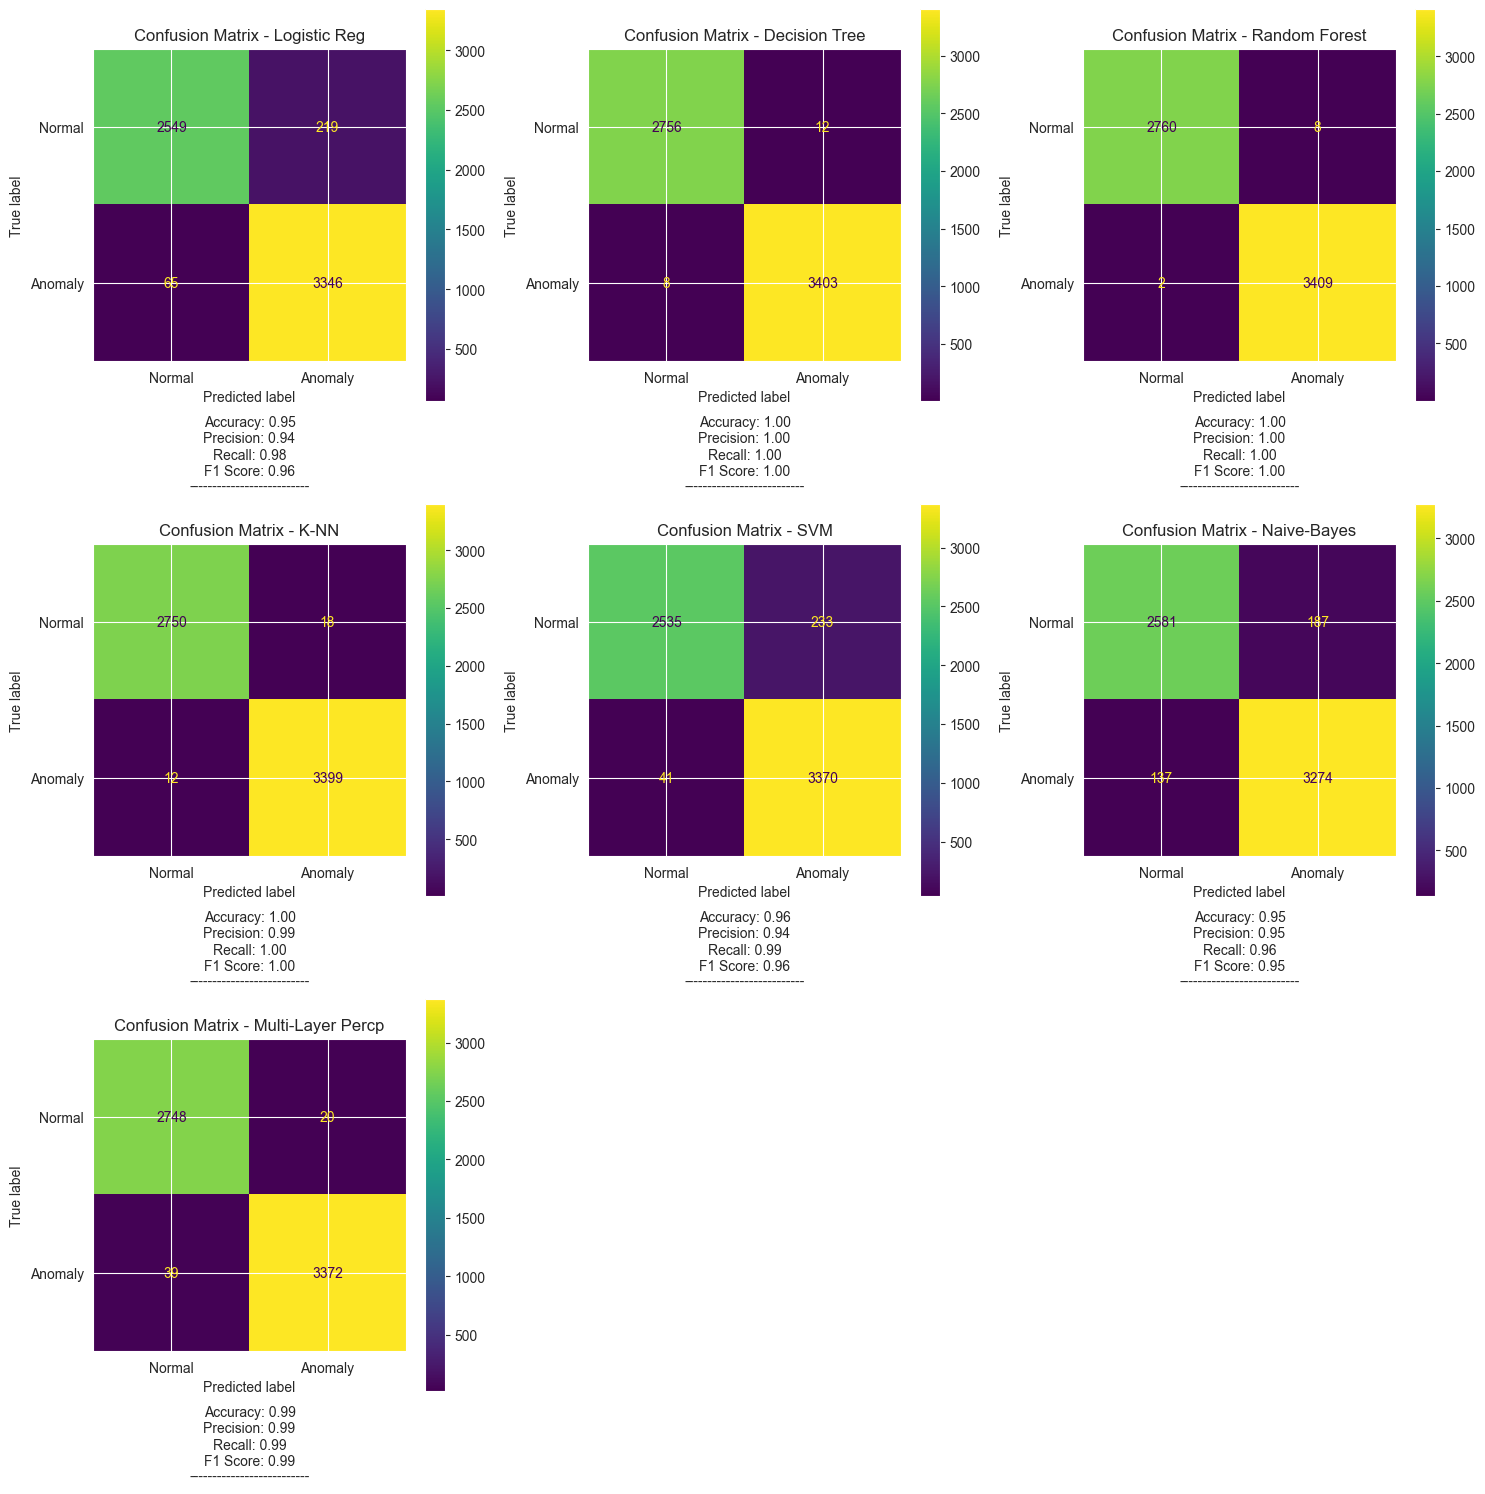

In [1187]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

# Calculate the number of rows and columns for the grid layout
num_models = len(models)
num_cols = 3  # Number of columns in the grid
num_rows = (num_models + num_cols - 1) // num_cols  # Round up the number of rows

# Create the grid layout
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axes if necessary
if num_rows == 1:
    axes = [axes]

# Iterate over the models and plot each confusion matrix
for i, (model_name, model) in enumerate(models.items()):
    row_idx = i // num_cols
    col_idx = i % num_cols
    
    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_test, model.predict(X_test))
    
    # Display the confusion matrix using ConfusionMatrixDisplay
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Normal', 'Anomaly'])
    disp.plot(ax=axes[row_idx][col_idx], cmap='viridis')
    axes[row_idx][col_idx].set_title(f'Confusion Matrix - {model_name}')
    
    # Add a small space after the confusion matrix
    axes[row_idx][col_idx].text(0, -0.1, '\n', horizontalalignment='center', verticalalignment='center', transform=axes[row_idx][col_idx].transAxes)
    
    # Calculate accuracy, precision, recall, and F1 score
    acc = accuracy_score(y_test, model.predict(X_test))
    precision = precision_score(y_test, model.predict(X_test))
    recall = recall_score(y_test, model.predict(X_test))
    f1 = f1_score(y_test, model.predict(X_test))
    
    # Display accuracy, precision, recall, and F1 score as text below the confusion matrix
       # Display accuracy, precision, recall, and F1 score as text below the confusion matrix
    axes[row_idx][col_idx].text(0.5, -0.3, f'Accuracy: {acc:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1 Score: {f1:.2f}\n--------------------------',
                                 horizontalalignment='center', verticalalignment='center', transform=axes[row_idx][col_idx].transAxes)

    


# Remove any extra blank subplots
if num_models < num_rows * num_cols:
    for i in range(num_models, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
